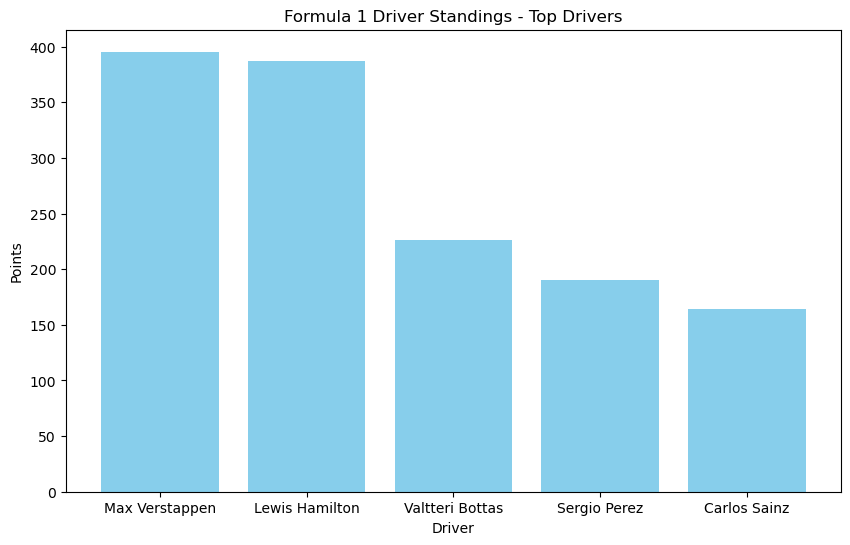

In [1]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
drivers = ["Max Verstappen", "Lewis Hamilton", "Valtteri Bottas", "Sergio Perez", "Carlos Sainz"]
points = [395.5, 387.5, 226, 190, 164.5]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(drivers, points, color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Points')
plt.title('Formula 1 Driver Standings - Top Drivers')
plt.show()

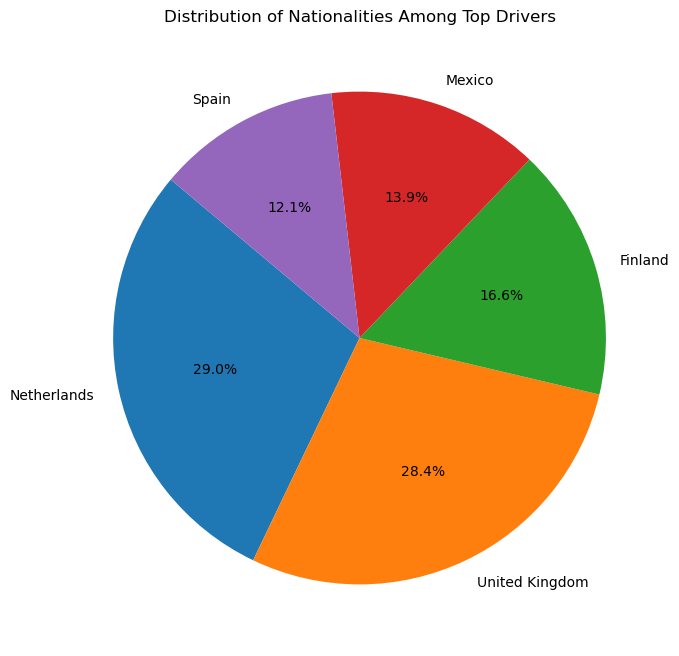

In [2]:
# Sample data (replace this with your actual data)
nationalities = ["NED", "GBR", "FIN", "MEX", "ESP"]
nationality_labels = ["Netherlands", "United Kingdom", "Finland", "Mexico", "Spain"]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(points, labels=nationality_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nationalities Among Top Drivers')
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

grand_prix_data = pd.read_csv("raceWin2021.csv")

In [7]:
grand_prix_data.head()

GRAND PRIX         DATE          WINNER                    CAR  LAPS  \
0         Bahrain  28 Mar 2021  Lewis Hamilton               MERCEDES    56   
1  Emilia Romagna  18 Apr 2021  Max Verstappen  RED BULL RACING HONDA    63   
2        Portugal  02 May 2021  Lewis Hamilton               MERCEDES    66   
3           Spain  09 May 2021  Lewis Hamilton               MERCEDES    66   
4          Monaco  23 May 2021  Max Verstappen  RED BULL RACING HONDA    78   

      TIME  
0  1:32:04  
1  2:02:35  
2  1:34:31  
3  1:33:08  
4  1:38:57

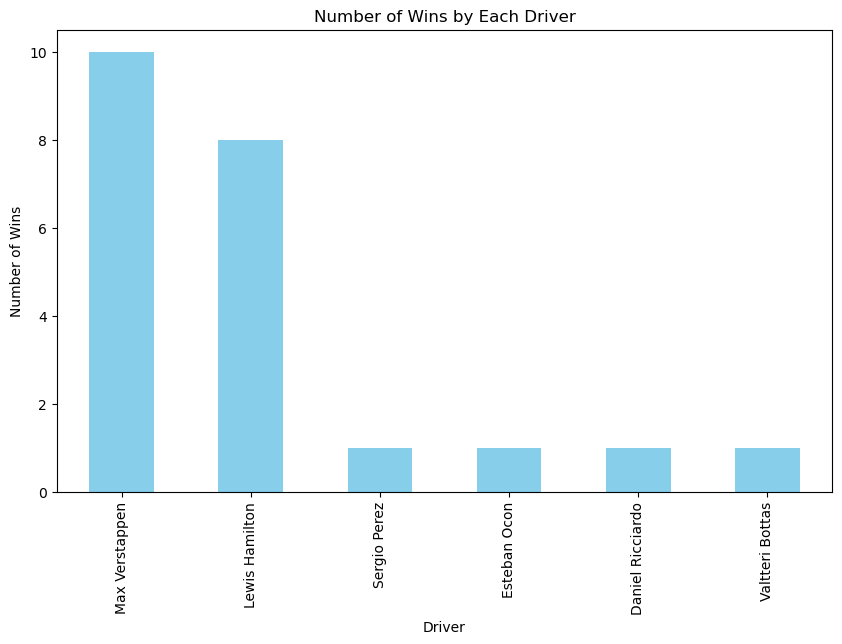

In [8]:
# 1. Bar chart: Number of wins by each driver
driver_wins = grand_prix_data['WINNER'].value_counts()
plt.figure(figsize=(10, 6))
driver_wins.plot(kind='bar', color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Each Driver')
plt.show()

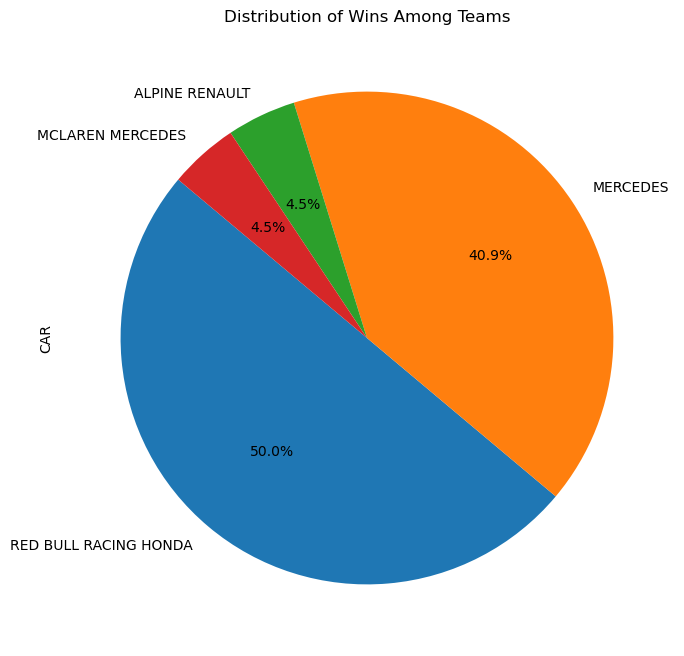

In [9]:
# 2. Pie chart: Distribution of wins among teams
team_wins = grand_prix_data['CAR'].value_counts()
plt.figure(figsize=(8, 8))
team_wins.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wins Among Teams')
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'path/to/' with the actual path to your CSV files
race1_results = pd.read_csv("bahrain-2021 - Sheet1.csv")
race2_results = pd.read_csv("imola-2021 - Sheet1.csv")
race3_results = pd.read_csv("portugal-2021 - Sheet1.csv")
race4_results = pd.read_csv("spain-2021 - Sheet1.csv")
race5_results = pd.read_csv("monaco-2021 - Sheet1.csv")

In [11]:
# Concatenate the DataFrames
all_races_results = pd.concat([race1_results, race2_results, race3_results, race4_results, race5_results])

# Convert 'PTS' column to numeric
all_races_results['PTS'] = pd.to_numeric(all_races_results['PTS'], errors='coerce')

# Sort by 'POS' and 'NO' columns
all_races_results = all_races_results.sort_values(by=['POS', 'NO'])

# Calculate cumulative points for each driver
all_races_results['Cumulative_Points'] = all_races_results.groupby('NO')['PTS'].cumsum()


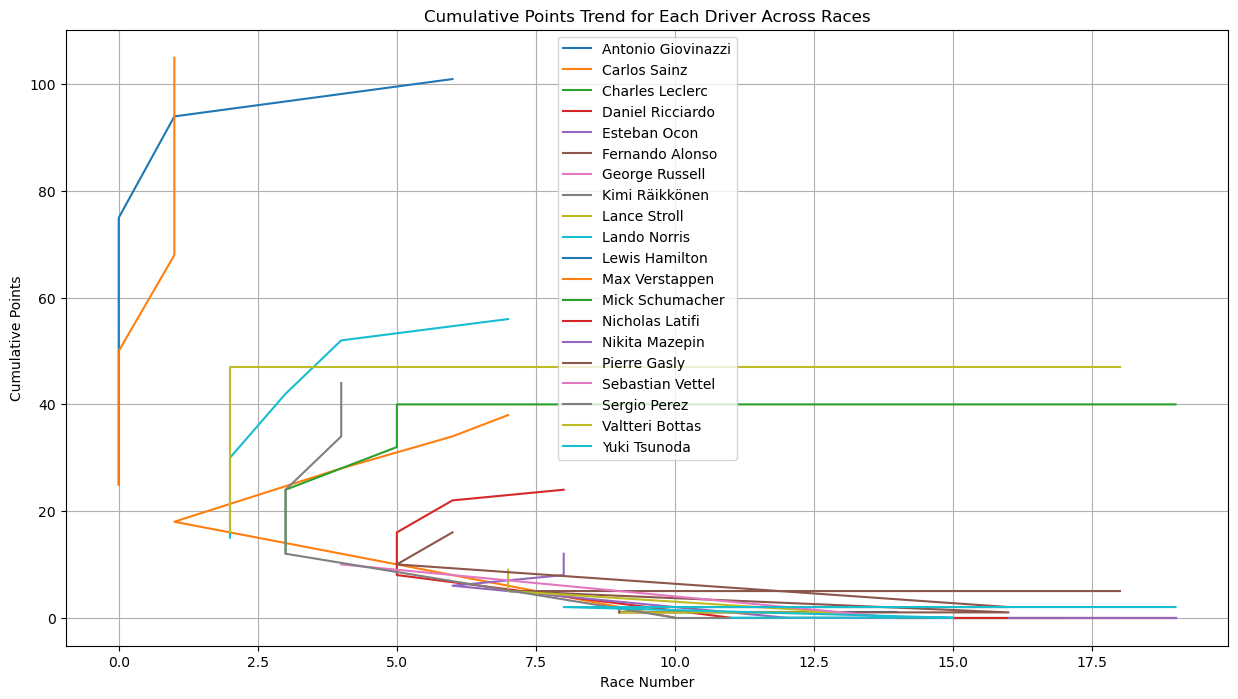

In [12]:
# Plotting
plt.figure(figsize=(15, 8))

for driver, data in all_races_results.groupby('DRIVER'):
    plt.plot(data['Cumulative_Points'], label=driver)

plt.title('Cumulative Points Trend for Each Driver Across Races')
plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_17619/10941568.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_drivers_data['Cumulative_Points'] = selected_drivers_data.groupby('DRIVER')['PTS'].cumsum()


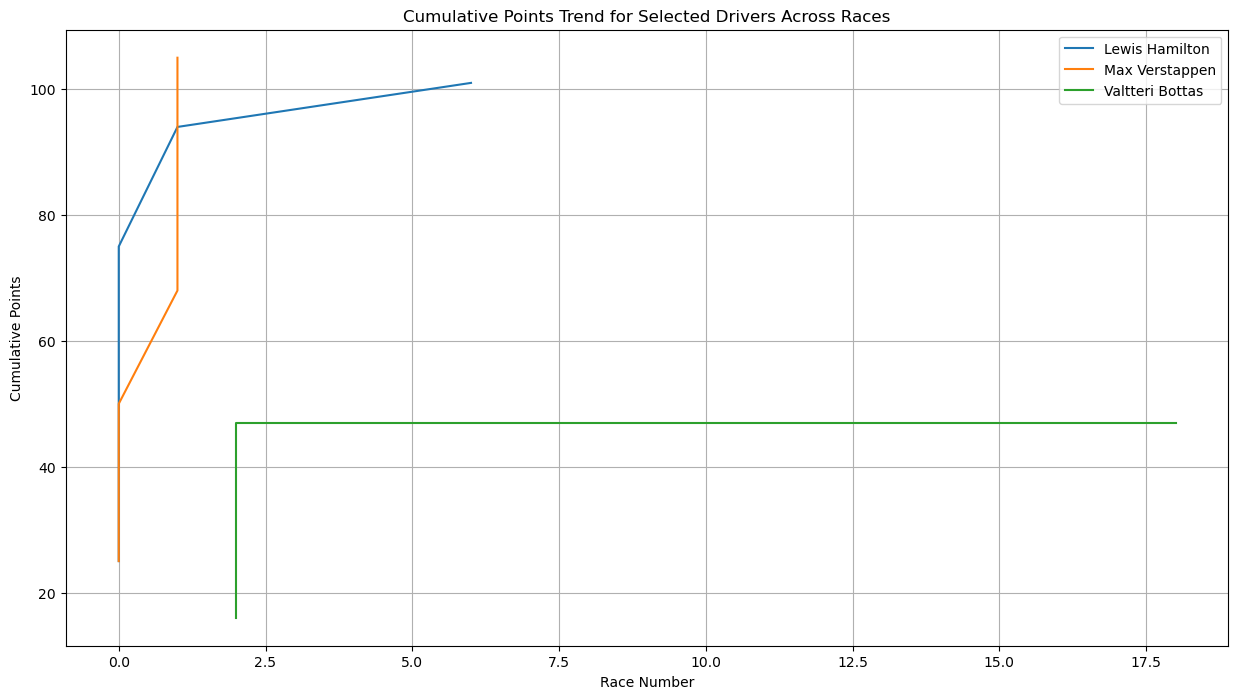

In [13]:
# Define the list of selected drivers
selected_drivers = ['Max Verstappen', 'Lewis Hamilton', 'Valtteri Bottas']

# Filter data for selected drivers
selected_drivers_data = all_races_results[all_races_results['DRIVER'].isin(selected_drivers)]

# Calculate cumulative points for each selected driver
selected_drivers_data['Cumulative_Points'] = selected_drivers_data.groupby('DRIVER')['PTS'].cumsum()

# Plotting
plt.figure(figsize=(15, 8))

for driver, data in selected_drivers_data.groupby('DRIVER'):
    plt.plot(data['Cumulative_Points'], label=driver)

plt.title('Cumulative Points Trend for Selected Drivers Across Races')
plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.legend()
plt.grid(True)
plt.show()

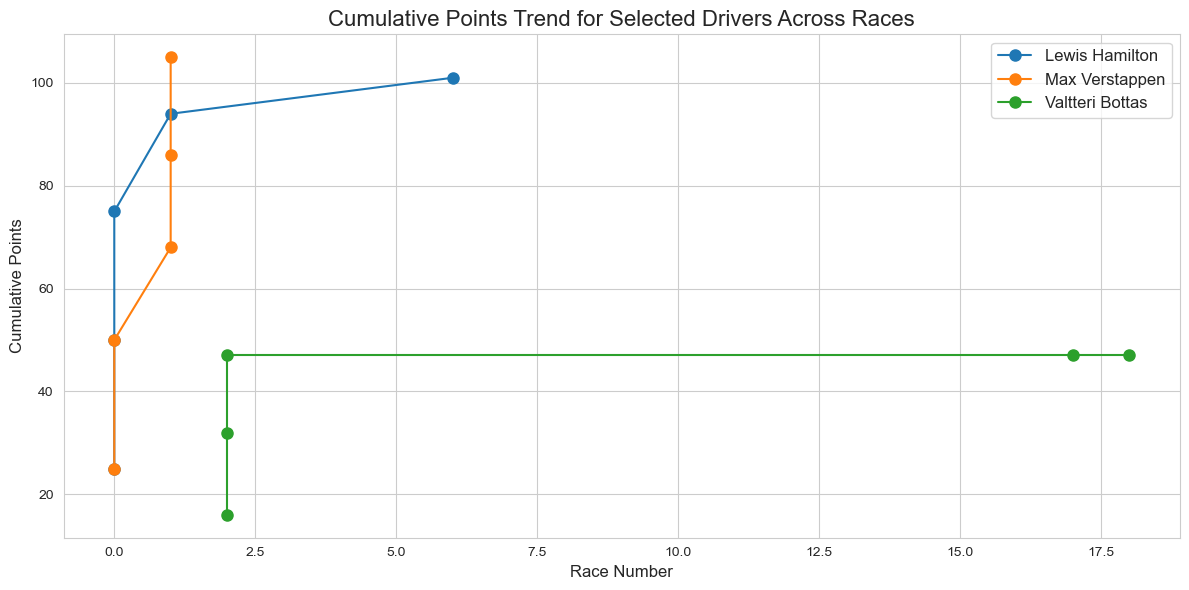

In [14]:
import seaborn as sns

# Set style using Seaborn
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(12, 6))

for driver, data in selected_drivers_data.groupby('DRIVER'):
    plt.plot(data['Cumulative_Points'], label=driver, marker='o', linestyle='-', markersize=8)

plt.title('Cumulative Points Trend for Selected Drivers Across Races', fontsize=16)
plt.xlabel('Race Number', fontsize=12)
plt.ylabel('Cumulative Points', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

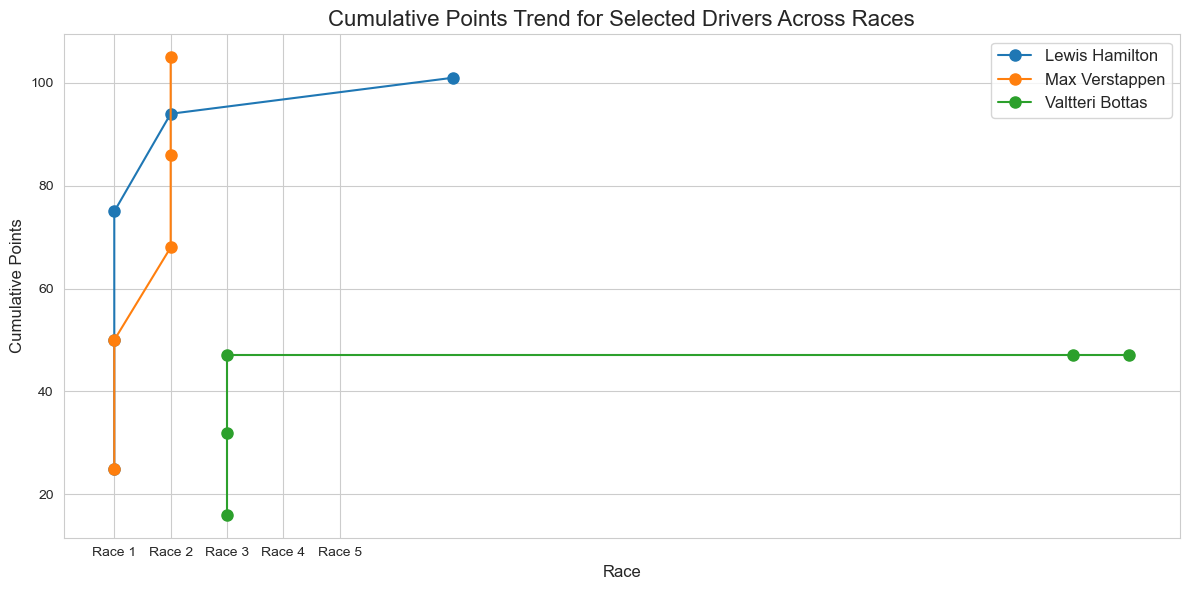

In [15]:
# Set style using Seaborn
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(12, 6))

for driver, data in selected_drivers_data.groupby('DRIVER'):
    plt.plot(data['Cumulative_Points'], label=driver, marker='o', linestyle='-', markersize=8)

# Set x-axis labels
race_numbers = ['Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5']
plt.xticks(range(len(race_numbers)), race_numbers)

plt.title('Cumulative Points Trend for Selected Drivers Across Races', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Cumulative Points', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

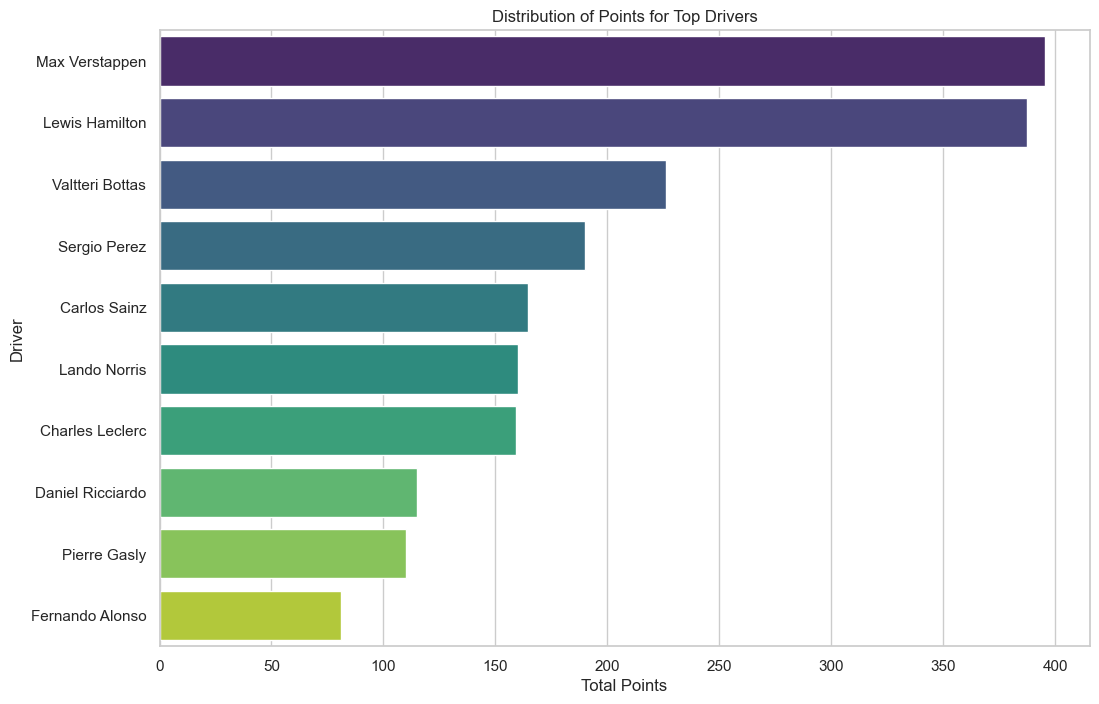

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

driverstandings = pd.read_csv("driverstandings.csv")

# Display the top 10 drivers based on points
top_drivers = driverstandings.nlargest(10, 'PTS')

# Assuming 'driver_results' is your dataset with driver results
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

top_drivers = driverstandings.nlargest(10, 'PTS')  # Displaying top 10 drivers
sns.barplot(x='PTS', y='DRIVER', data=top_drivers, palette='viridis')

plt.title('Distribution of Points for Top Drivers')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.show()

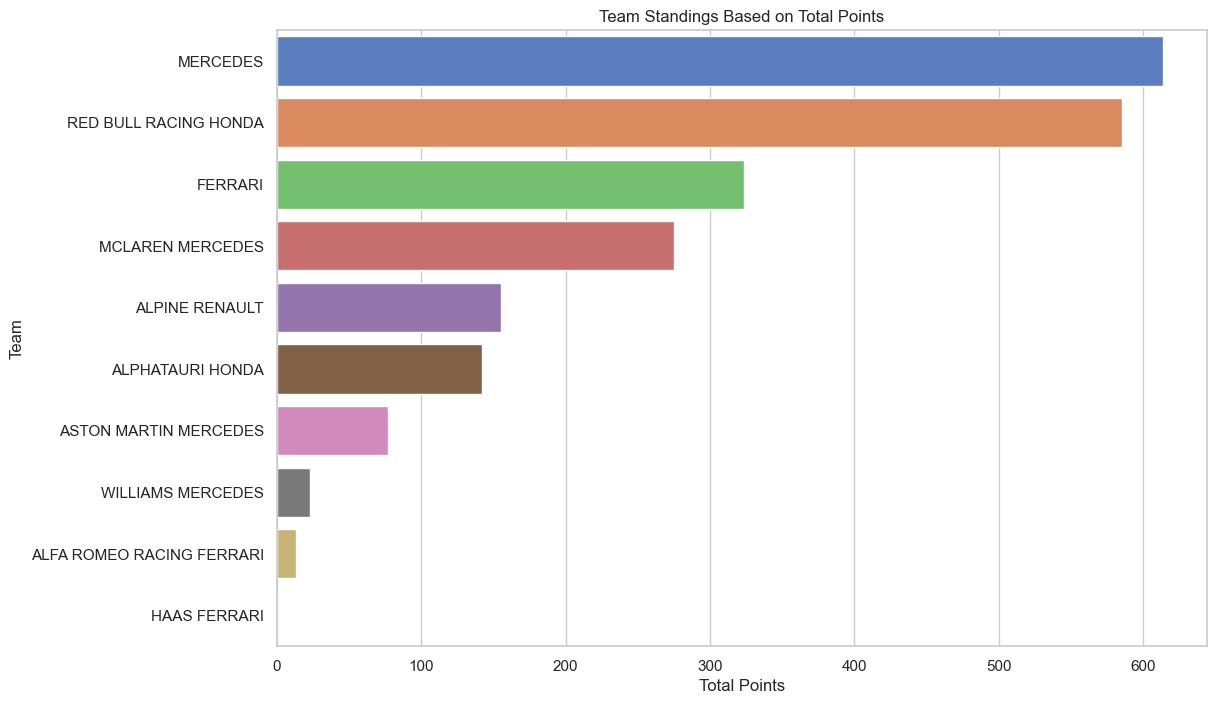

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'driver_standings.csv' is the name of your driver standings file
driver_standings = pd.read_csv('driverstandings.csv')

# Sum up points for each team
team_points = driver_standings.groupby('CAR')['PTS'].sum().reset_index()

# Sort the teams based on total points
team_points = team_points.sort_values(by='PTS', ascending=False)

# Create a bar plot for team standings
plt.figure(figsize=(12, 8))
sns.barplot(x='PTS', y='CAR', data=team_points, palette='muted')

# Set plot labels and title
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.title('Team Standings Based on Total Points')

# Show the plot
plt.show()


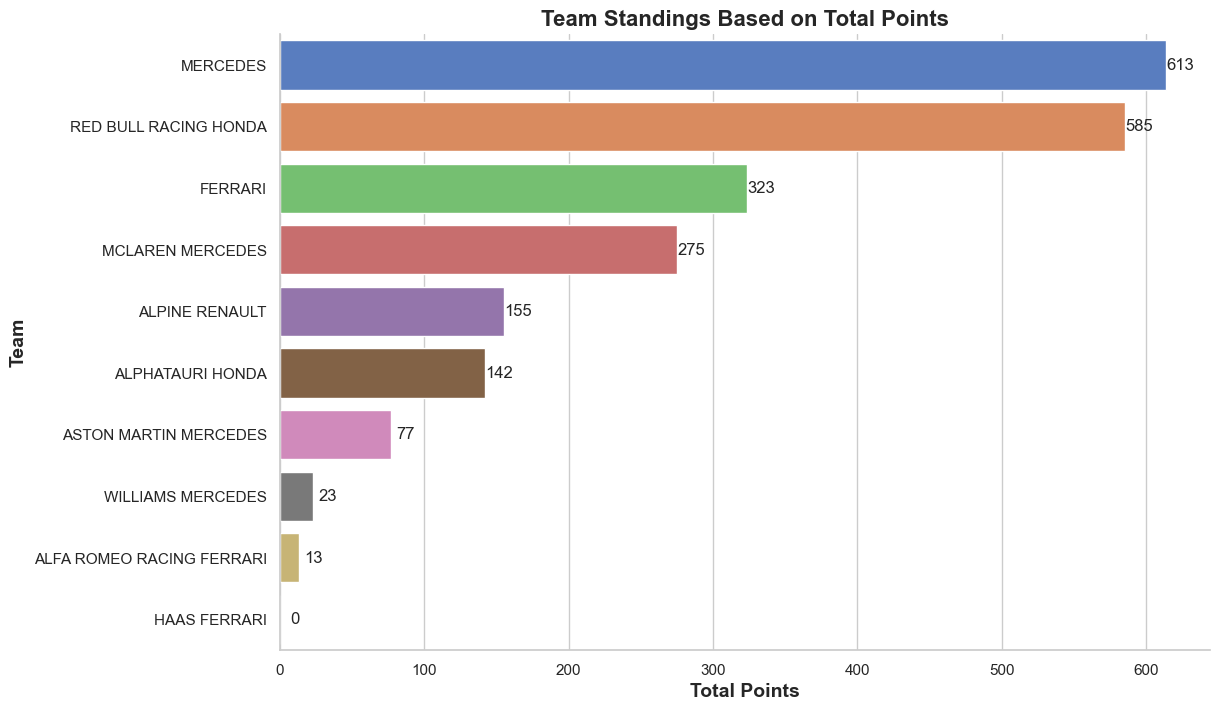

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'driver_standings.csv' is the name of your driver standings file
driver_standings = pd.read_csv('driverstandings.csv')

# Sum up points for each team
team_points = driver_standings.groupby('CAR')['PTS'].sum().reset_index()

# Sort the teams based on total points
team_points = team_points.sort_values(by='PTS', ascending=False)

# Set the seaborn style
sns.set_style("whitegrid")

# Create a bar plot for team standings
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='PTS', y='CAR', data=team_points, palette='muted')

# Set plot labels and title
plt.xlabel('Total Points', fontsize=14, weight='bold')
plt.ylabel('Team', fontsize=14, weight='bold')
plt.title('Team Standings Based on Total Points', fontsize=16, weight='bold')

# Add data labels
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="center", va="center", fontsize=12)

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()


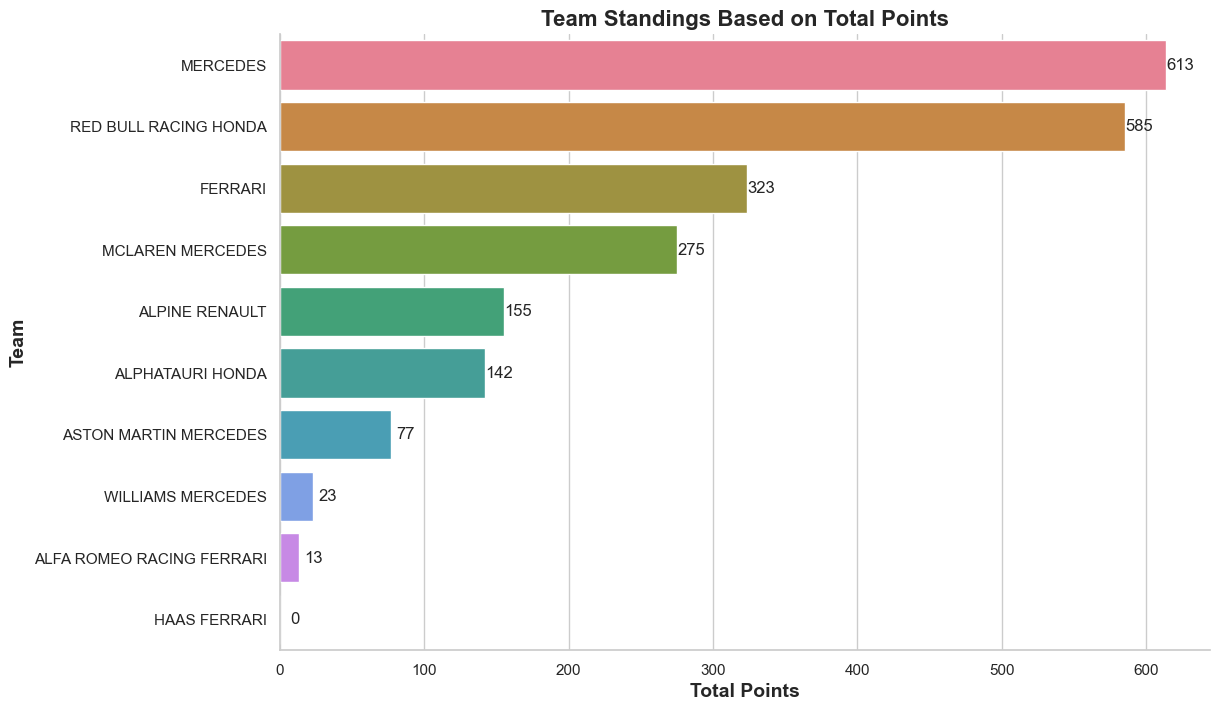

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'driver_standings.csv' is the name of your driver standings file
driver_standings = pd.read_csv('driverstandings.csv')

# Sum up points for each team
team_points = driver_standings.groupby('CAR')['PTS'].sum().reset_index()

# Sort the teams based on total points
team_points = team_points.sort_values(by='PTS', ascending=False)

# Set the seaborn style
sns.set_style("whitegrid")

# Define a vibrant color palette with higher contrast
palette = sns.color_palette("husl", n_colors=len(team_points))

# Create a bar plot for team standings
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='PTS', y='CAR', data=team_points, palette=palette)

# Set plot labels and title
plt.xlabel('Total Points', fontsize=14, weight='bold')
plt.ylabel('Team', fontsize=14, weight='bold')
plt.title('Team Standings Based on Total Points', fontsize=16, weight='bold')

# Add data labels
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="center", va="center", fontsize=12)

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()


In [29]:
import pandas as pd

# Assuming 'race1.csv', 'race2.csv', 'race3.csv', 'race4.csv', and 'race5.csv' are the names of your CSV files
files = ['bahrain-2021.csv', 'imola-2021.csv', 'portugal-2021.csv', 'spain-2021.csv', 'monaco-2021.csv']

# List to store the filtered dataframes for Max Verstappen from each race
max_verstappen_dataframes = []

# Read each CSV file, filter data for Max Verstappen, and append the filtered dataframe to the list
for file in files:
    race_results = pd.read_csv(file)
    max_verstappen_results = race_results[race_results['DRIVER'] == 'Max Verstappen']
    max_verstappen_dataframes.append(max_verstappen_results)

# Concatenate the filtered dataframes into a single dataframe
max_verstappen_combined = pd.concat(max_verstappen_dataframes)





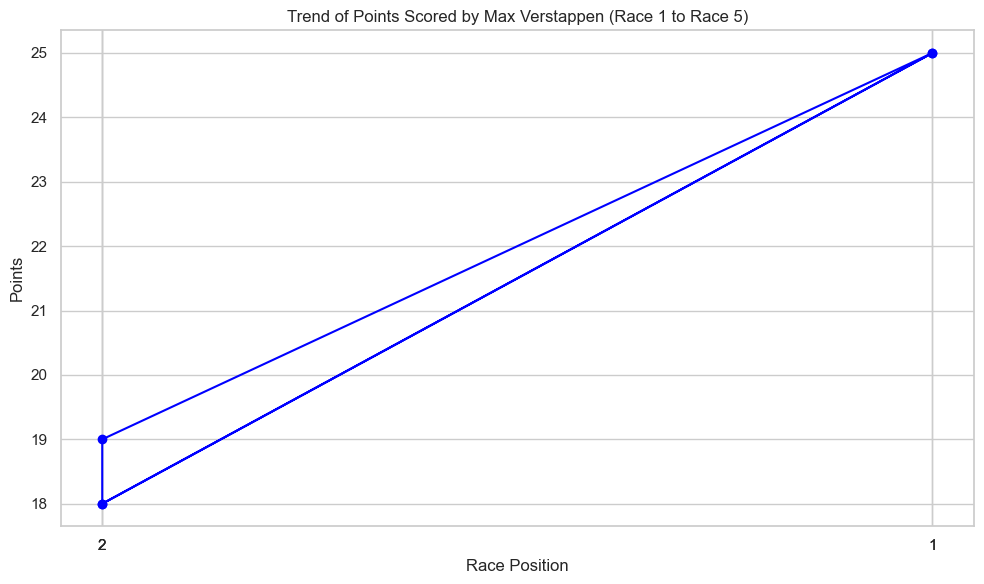

In [30]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_verstappen_combined['POS'], max_verstappen_combined['PTS'], marker='o', color='blue', linestyle='-')
plt.xlabel('Race Position')
plt.ylabel('Points')
plt.title('Trend of Points Scored by Max Verstappen (Race 1 to Race 5)')
plt.grid(True)
plt.xticks(max_verstappen_combined['POS'])
plt.tight_layout()
plt.show()


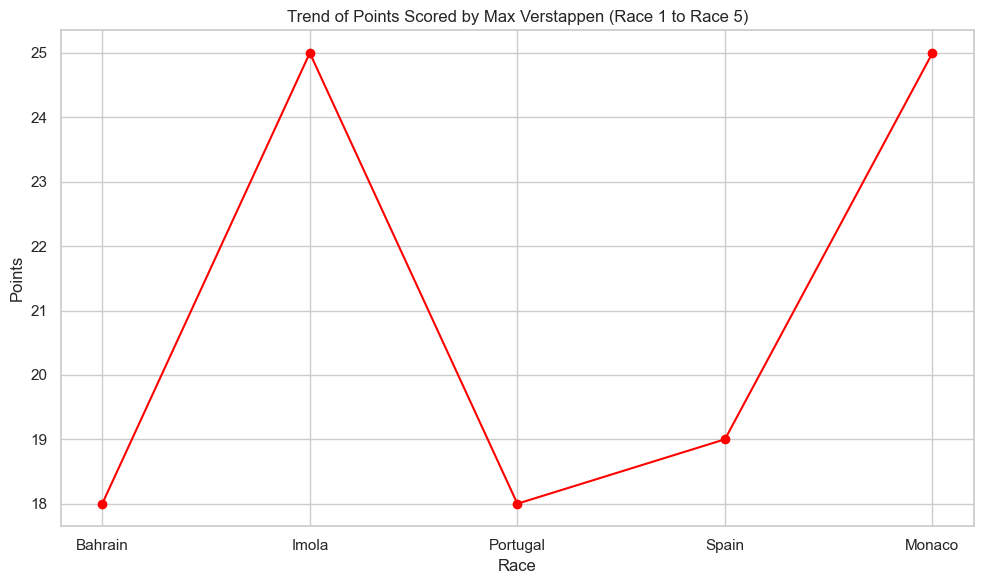

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for race 1 to race 5
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Filter data for Max Verstappen in each race
max_verstappen_race1 = race1_data[race1_data['DRIVER'] == 'Max Verstappen']
max_verstappen_race2 = race2_data[race2_data['DRIVER'] == 'Max Verstappen']
max_verstappen_race3 = race3_data[race3_data['DRIVER'] == 'Max Verstappen']
max_verstappen_race4 = race4_data[race4_data['DRIVER'] == 'Max Verstappen']
max_verstappen_race5 = race5_data[race5_data['DRIVER'] == 'Max Verstappen']

# Concatenate dataframes into one dataframe
max_verstappen_combined = pd.concat([max_verstappen_race1, max_verstappen_race2, max_verstappen_race3,
                                     max_verstappen_race4, max_verstappen_race5])

# Define race names for x-axis
race_names = ['Bahrain', 'Imola', 'Portugal', 'Spain', 'Monaco']

# Plot the trend of points scored by Max Verstappen
plt.figure(figsize=(10, 6))
plt.plot(race_names, max_verstappen_combined['PTS'], marker='o', color='red', linestyle='-')
plt.xlabel('Race')
plt.ylabel('Points')
plt.title('Trend of Points Scored by Max Verstappen (Race 1 to Race 5)')
plt.grid(True)
plt.tight_layout()
plt.show()


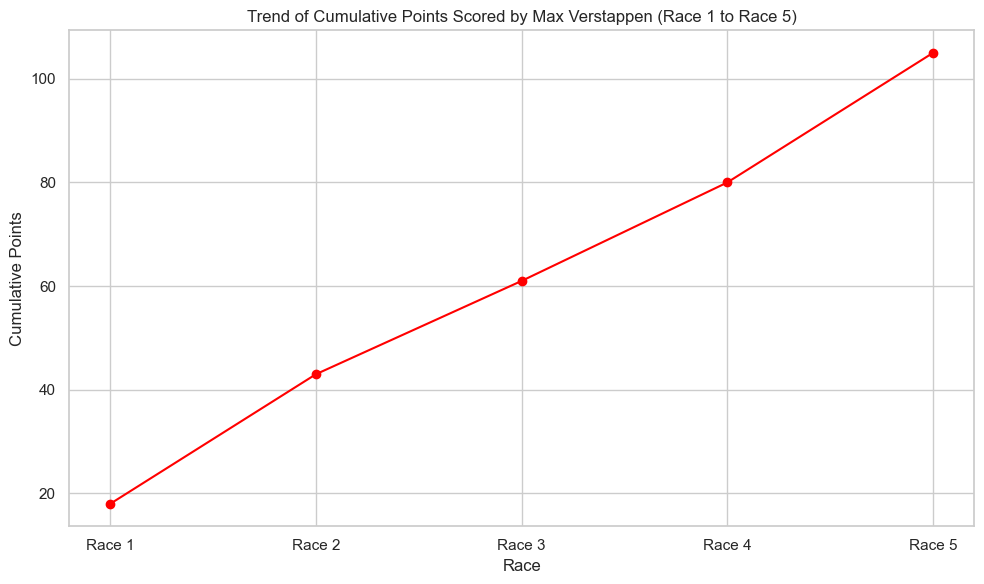

In [33]:
# Calculate cumulative points after each race
max_verstappen_combined['Cumulative Points'] = max_verstappen_combined['PTS'].cumsum()

# Define race names for x-axis
race_names = ['Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5']

# Plot the trend of points scored by Max Verstappen with cumulative points
plt.figure(figsize=(10, 6))
plt.plot(race_names, max_verstappen_combined['Cumulative Points'], marker='o', color='red', linestyle='-')
plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Trend of Cumulative Points Scored by Max Verstappen (Race 1 to Race 5)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for race 1 to race 5
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Concatenate all race data
all_race_data = pd.concat([race1_data, race2_data, race3_data, race4_data, race5_data])

# Group by driver and sum points
driver_points = all_race_data.groupby('DRIVER')['PTS'].sum()

# Select top 5 drivers
top_5_drivers = driver_points.nlargest(5).index.tolist()

# Create a DataFrame to store cumulative points for top 5 drivers after each race
cumulative_points_df = pd.DataFrame(index=range(1, 6))

# Iterate over top 5 drivers
for driver in top_5_drivers:
    # Filter data for the current driver
    driver_data = all_race_data[all_race_data['DRIVER'] == driver]
    # Calculate cumulative points after each race
    cumulative_points = driver_data.groupby('NO')['PTS'].sum().cumsum()
    # Add cumulative points to the DataFrame
    cumulative_points_df[driver] = cumulative_points.values

# Plot the trend of cumulative points for top 5 drivers
plt.figure(figsize=(10, 6))
for driver in top_5_drivers:
    plt.plot(cumulative_points_df.index, cumulative_points_df[driver], marker='o', label=driver)
plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Trend of Cumulative Points Scored by Top 5 Drivers (Race 1 to Race 5)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Length of values (1) does not match length of index (5)

/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_17619/3902405498.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_data['Cumulative Points'] = driver_data['PTS'].cumsum()
/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_17619/3902405498.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_data['Cumulative Points'] = driver_data['PTS'].cumsum()
/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_17619/3902405498.py:25: SettingWithCopyWarning: 
A value is trying to

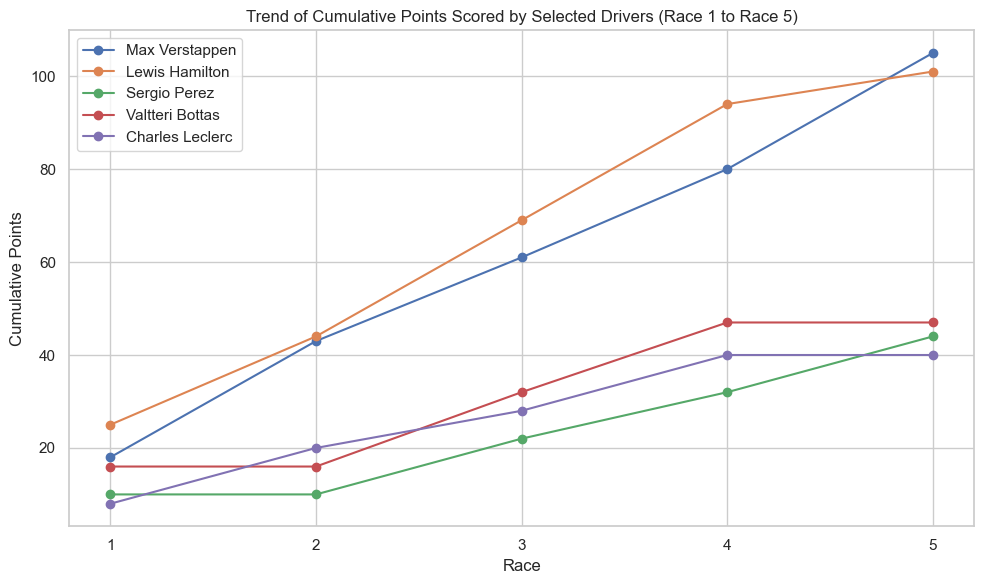

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for race 1 to race 5
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Concatenate dataframes for all races
all_races_data = pd.concat([race1_data, race2_data, race3_data, race4_data, race5_data])

# Define the drivers to include in the plot
drivers_to_include = ['Max Verstappen', 'Lewis Hamilton', 'Sergio Perez', 'Valtteri Bottas', 'Charles Leclerc']

# List to store cumulative points for each driver after each race
cumulative_points = []

# Iterate over the drivers to include
for driver in drivers_to_include:
    # Filter data for the current driver
    driver_data = all_races_data[all_races_data['DRIVER'] == driver]
    # Calculate cumulative points after each race for the current driver
    driver_data['Cumulative Points'] = driver_data['PTS'].cumsum()
    # Add cumulative points to the list
    cumulative_points.append(driver_data['Cumulative Points'].tolist())

# Plot the trend of cumulative points scored by the selected drivers
plt.figure(figsize=(10, 6))
for i, driver in enumerate(drivers_to_include):
    plt.plot(range(1, 6), cumulative_points[i], marker='o', label=driver)

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Trend of Cumulative Points Scored by Selected Drivers (Race 1 to Race 5)')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


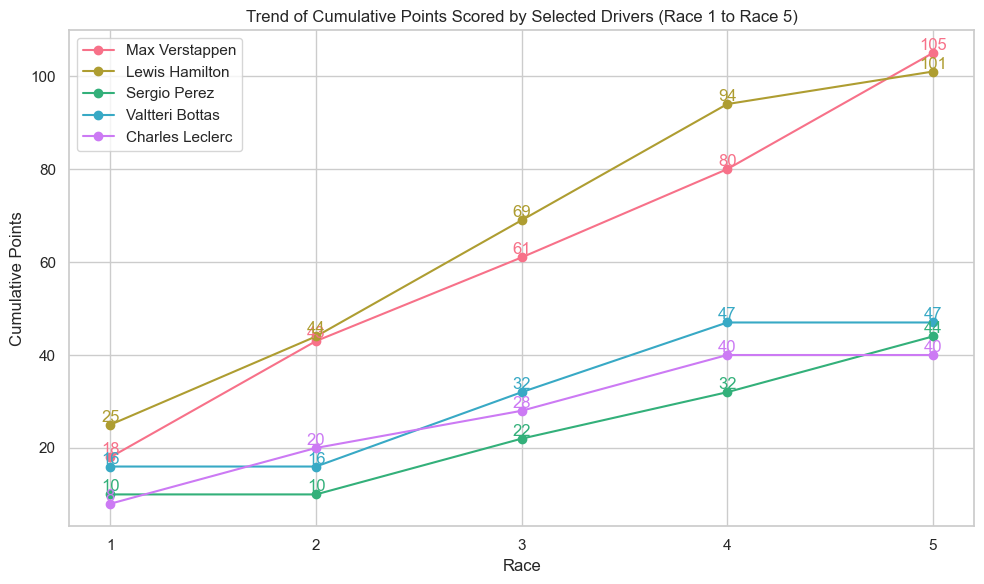

In [36]:
import seaborn as sns

# Plot the trend of cumulative points scored by the selected drivers
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(drivers_to_include))
for i, driver in enumerate(drivers_to_include):
    plt.plot(range(1, 6), cumulative_points[i], marker='o', color=colors[i], label=driver)
    # Annotate total points for each driver after each race
    for race, points in enumerate(cumulative_points[i]):
        plt.text(race + 1, points, f'{points}', ha='center', va='bottom', color=colors[i])

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Trend of Cumulative Points Scored by Selected Drivers (Race 1 to Race 5)')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

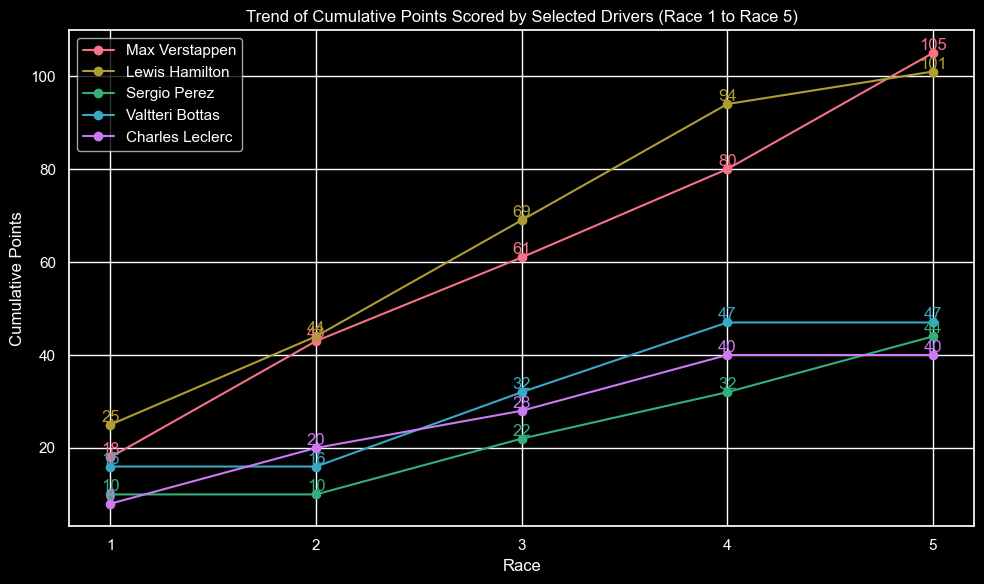

In [37]:
import seaborn as sns

plt.style.use('dark_background')

# Plot the trend of cumulative points scored by the selected drivers
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(drivers_to_include))
for i, driver in enumerate(drivers_to_include):
    plt.plot(range(1, 6), cumulative_points[i], marker='o', color=colors[i], label=driver)
    # Annotate total points for each driver after each race
    for race, points in enumerate(cumulative_points[i]):
        plt.text(race + 1, points, f'{points}', ha='center', va='bottom', color=colors[i])

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Trend of Cumulative Points Scored by Selected Drivers (Race 1 to Race 5)')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


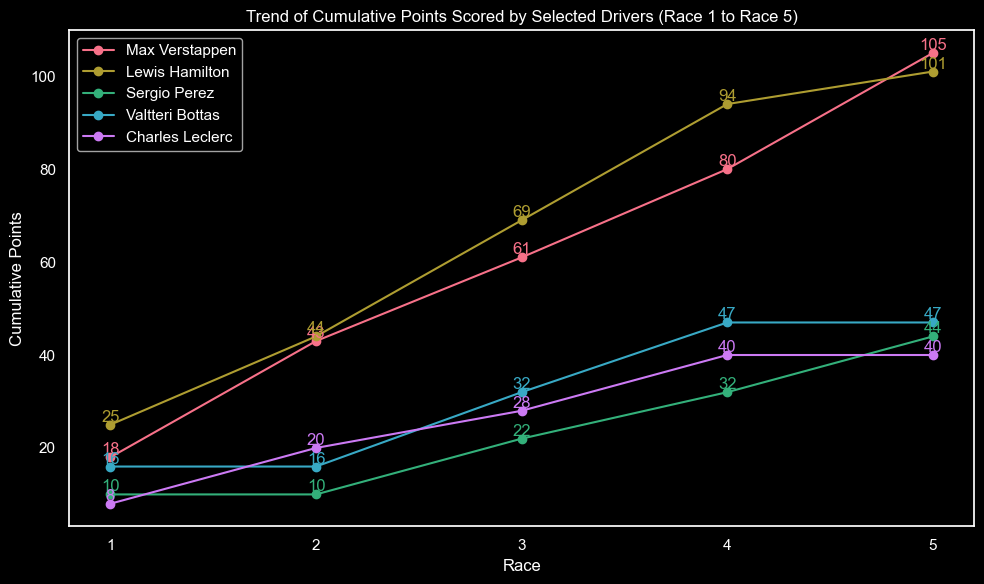

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background style to dark
plt.style.use('dark_background')

# Plot the trend of cumulative points scored by the selected drivers
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(drivers_to_include))
for i, driver in enumerate(drivers_to_include):
    plt.plot(range(1, 6), cumulative_points[i], marker='o', color=colors[i], label=driver)
    # Annotate total points for each driver after each race
    for race, points in enumerate(cumulative_points[i]):
        plt.text(race + 1, points, f'{points}', ha='center', va='bottom', color=colors[i])

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Trend of Cumulative Points Scored by Selected Drivers (Race 1 to Race 5)')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

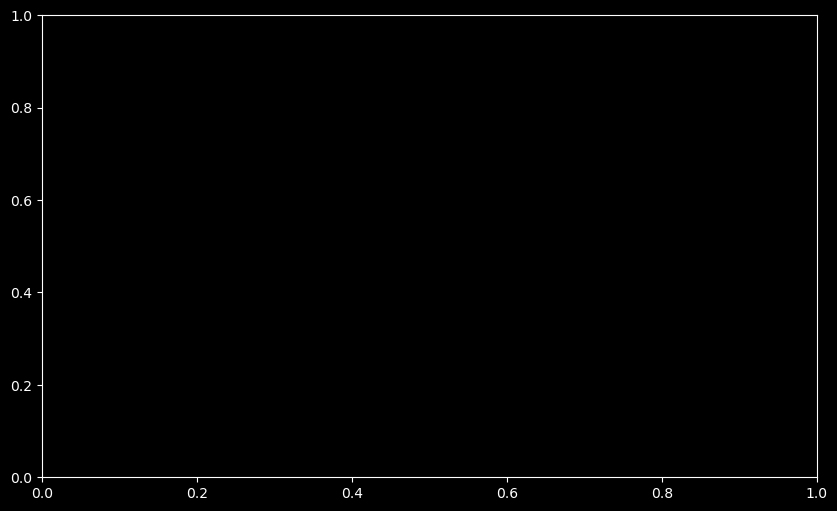

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background style to dark
plt.style.use('dark_background')

# Read CSV files for race 1 to race 5
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Concatenate dataframes for all races
all_races_data = pd.concat([race1_data, race2_data, race3_data, race4_data, race5_data])

# Define the teams (cars) to include in the plot
teams_to_include = ['RED BULL RACING HONDA', 'MERCEDES', 'FERRARI', 'MCLAREN MERCEDES', 'ALPINE RENAULT']

# List to store cumulative points for each team after each race
cumulative_points = []

# Iterate over the teams to include
for team in teams_to_include:
    # Filter data for the current team
    team_data = all_races_data[all_races_data['CAR'] == team]
    # Sort the data by race number
    team_data = team_data.sort_values(by='NO')
    # Calculate cumulative points after each race for the current team
    team_data['Cumulative Points'] = team_data['PTS'].cumsum()
    # Add cumulative points to the list
    cumulative_points.append(team_data['Cumulative Points'].tolist())

# Plot the trend of cumulative points scored by the selected teams
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(teams_to_include))
races = range(1, 6)  # Number of races
for i, team in enumerate(teams_to_include):
    plt.plot(races, cumulative_points[i], marker='o', color=colors[i], label=team)
    # Annotate total points for each team after each race
    for race, points in zip(races, cumulative_points[i]):
        plt.text(race, points, f'{points}', ha='center', va='bottom', color=colors[i])

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Trend of Cumulative Points Scored by Selected Teams (Race 1 to Race 5)')
plt.xticks(races)
plt.legend()
plt.tight_layout()
plt.show()


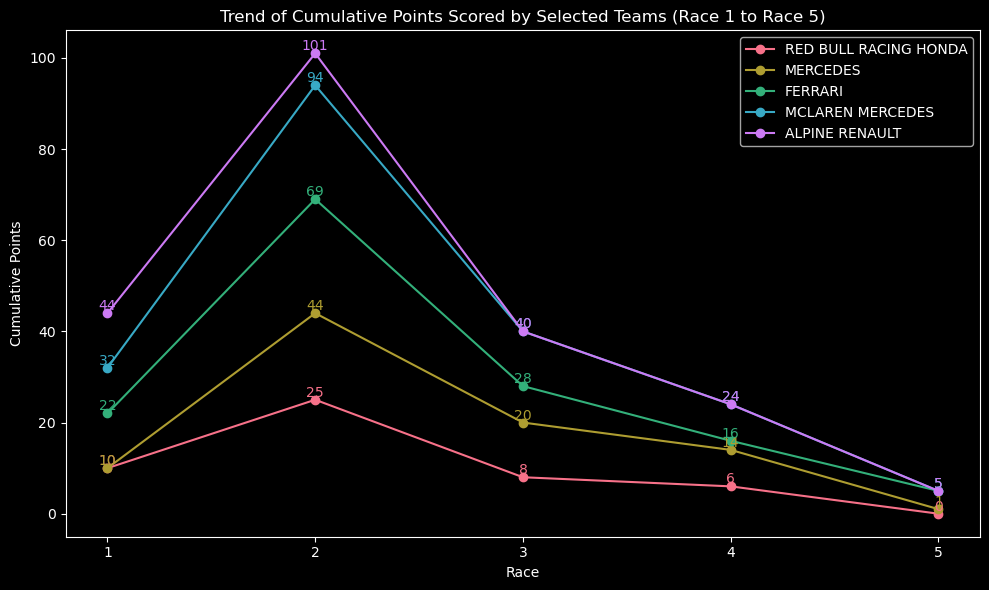

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background style to dark
plt.style.use('dark_background')

# Read CSV files for race 1 to race 5
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Concatenate dataframes for all races
all_races_data = pd.concat([race1_data, race2_data, race3_data, race4_data, race5_data])

# Define the teams (cars) to include in the plot
teams_to_include = ['RED BULL RACING HONDA', 'MERCEDES', 'FERRARI', 'MCLAREN MERCEDES', 'ALPINE RENAULT']

# List to store cumulative points for each team after each race
cumulative_points = []

# Iterate over the teams to include
for team in teams_to_include:
    # Filter data for the current team
    team_data = all_races_data[all_races_data['CAR'] == team]
    # Sort the data by race number
    team_data = team_data.sort_values(by='NO')
    # Calculate cumulative points after each race for the current team
    team_data['Cumulative Points'] = team_data['PTS'].cumsum()
    # Add cumulative points to the list
    cumulative_points.append(team_data['Cumulative Points'].tolist())

# Transpose cumulative_points to have races as rows and teams as columns
cumulative_points_transposed = list(zip(*cumulative_points))

# Plot the trend of cumulative points scored by the selected teams
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(teams_to_include))
races = range(1, 6)  # Number of races
for i, team in enumerate(teams_to_include):
    plt.plot(races, cumulative_points_transposed[i], marker='o', color=colors[i], label=team)
    # Annotate total points for each team after each race
    for race, points in zip(races, cumulative_points_transposed[i]):
        plt.text(race, points, f'{points}', ha='center', va='bottom', color=colors[i])

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Trend of Cumulative Points Scored by Selected Teams (Race 1 to Race 5)')
plt.xticks(races)
plt.legend()
plt.tight_layout()
plt.show()


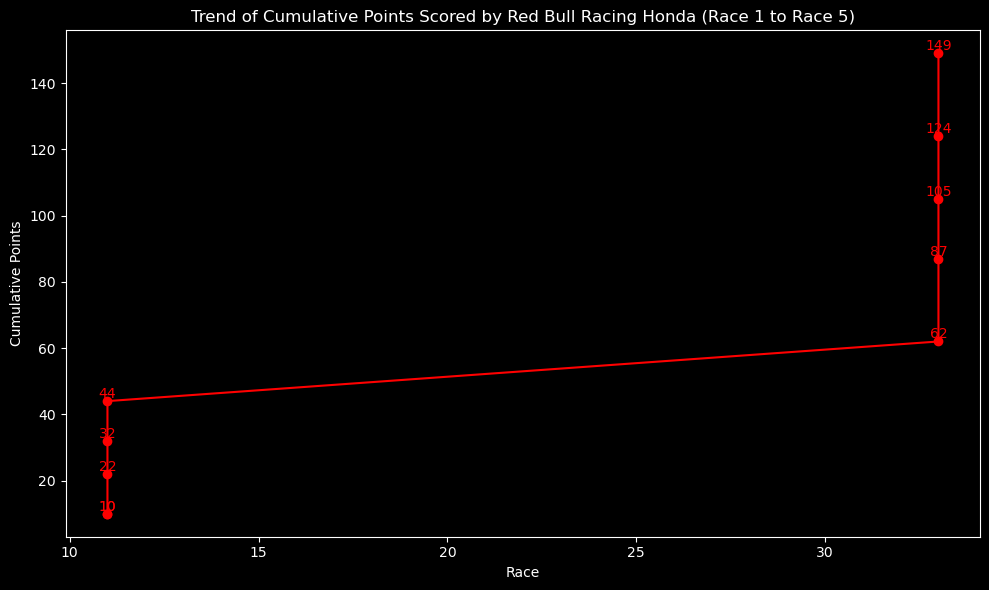

In [5]:
# Filter data for the Red Bull Racing Honda team
red_bull_data = all_races_data[all_races_data['CAR'] == 'RED BULL RACING HONDA']

# Sort the data by race number
red_bull_data = red_bull_data.sort_values(by='NO')

# Calculate cumulative points after each race for the Red Bull Racing Honda team
red_bull_data['Cumulative Points'] = red_bull_data['PTS'].cumsum()

# Plot the trend of cumulative points scored by the Red Bull Racing Honda team
plt.figure(figsize=(10, 6))
plt.plot(red_bull_data['NO'], red_bull_data['Cumulative Points'], marker='o', color='red', linestyle='-')
for race, points in zip(red_bull_data['NO'], red_bull_data['Cumulative Points']):
    plt.text(race, points, f'{points}', ha='center', va='bottom', color='red')
plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Trend of Cumulative Points Scored by Red Bull Racing Honda (Race 1 to Race 5)')
plt.grid(False)  # Remove gridlines
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# List of race CSV files
race_files = ['bahrain-2021.csv', 'imola-2021.csv', 'portugal-2021.csv', 'spain-2021.csv', 'monaco-2021.csv']

# Dictionary to store total points for each team after each race
team_points = {}

# Iterate through each race file
for race_file in race_files:
    # Read the race data from CSV file
    race_data = pd.read_csv(race_file)
    
    # Iterate through each row in the race data
    for index, row in race_data.iterrows():
        # Check if the driver is not classified (NC)
        if row['POS'] != 'NC':
            # Extract the team (car) from the driver's row
            team = row['CAR']
            # Check if the team already exists in the dictionary
            if team in team_points:
                # Add the driver's points to the team's total points
                team_points[team] += row['PTS']
            else:
                # Initialize the team's total points with the driver's points
                team_points[team] = row['PTS']

# Print the total points for each team after each race
for race_num, points_dict in enumerate(team_points.items(), start=1):
    print(f"Race {race_num} Total Points for each team:")
    for team, points in points_dict:
        print(f"Team: {team}, Total Points: {points}")
    print()


Race 1 Total Points for each team:


ValueError: too many values to unpack (expected 2)

In [9]:
import pandas as pd

# List of race CSV files
race_files = ['bahrain-2021.csv', 'imola-2021.csv', 'portugal-2021.csv', 'spain-2021.csv', 'monaco-2021.csv']

# Dictionary to store total points for each team after each race
team_points = {}

# Iterate through each race file
for race_file in race_files:
    # Read the race data from CSV file
    race_data = pd.read_csv(race_file)
    
    # Iterate through each row in the race data
    for index, row in race_data.iterrows():
        # Check if the driver is not classified (NC)
        if row['POS'] != 'NC':
            # Extract the team (car) from the driver's row
            team = row['CAR']
            # Check if the team already exists in the dictionary
            if team in team_points:
                # Add the driver's points to the team's total points
                team_points[team] += row['PTS']
            else:
                # Initialize the team's total points with the driver's points
                team_points[team] = row['PTS']

# Print the total points for each team after each race
for race_num, (team, points) in enumerate(team_points.items(), start=1):
    print(f"Race {race_num} Total Points for each team:")
    print(f"Team: {team}, Total Points: {points}")
    print()


Race 1 Total Points for each team:
Team: MERCEDES, Total Points: 148

Race 2 Total Points for each team:
Team: RED BULL RACING HONDA, Total Points: 149

Race 3 Total Points for each team:
Team: MCLAREN MERCEDES, Total Points: 80

Race 4 Total Points for each team:
Team: FERRARI, Total Points: 78

Race 5 Total Points for each team:
Team: ALPHATAURI HONDA, Total Points: 18

Race 6 Total Points for each team:
Team: ASTON MARTIN MERCEDES, Total Points: 19

Race 7 Total Points for each team:
Team: ALFA ROMEO RACING FERRARI, Total Points: 1

Race 8 Total Points for each team:
Team: ALPINE RENAULT, Total Points: 17

Race 9 Total Points for each team:
Team: WILLIAMS MERCEDES, Total Points: 0

Race 10 Total Points for each team:
Team: HAAS FERRARI, Total Points: 0



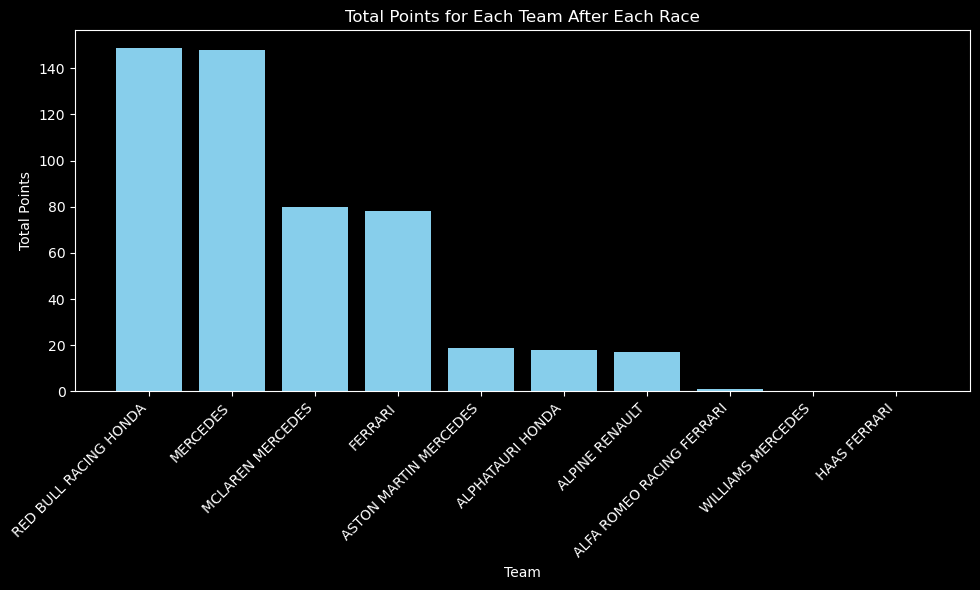

In [10]:
# Convert the dictionary to DataFrame for plotting
team_points_df = pd.DataFrame(list(team_points.items()), columns=['Team', 'Total Points'])

# Sort the DataFrame by total points
team_points_df = team_points_df.sort_values(by='Total Points', ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(team_points_df['Team'], team_points_df['Total Points'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.title('Total Points for Each Team After Each Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Read the CSV file for the 1st race
race1_data = pd.read_csv("bahrain-2021.csv")

# Initialize the total points for Red Bull Racing
red_bull_points = 0

# Iterate through each row in the race data
for index, row in race1_data.iterrows():
    # Check if the driver is from Red Bull Racing
    if row['CAR'] == 'RED BULL RACING HONDA':
        # Add the driver's points to the total points for Red Bull Racing
        red_bull_points += row['PTS']

# Print the total points scored by Red Bull Racing after the 1st race
print("Total points scored by Red Bull Racing after the 1st race:", red_bull_points)


Total points scored by Red Bull Racing after the 1st race: 28


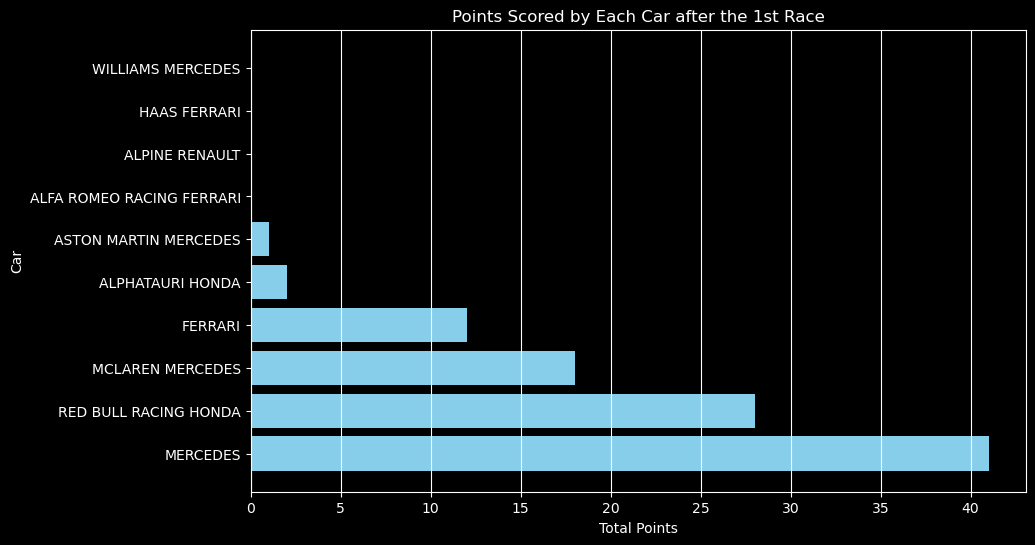

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file for the 1st race
race1_data = pd.read_csv("bahrain-2021.csv")

# Group the data by car and calculate the total points scored by each car
car_points = race1_data.groupby('CAR')['PTS'].sum().reset_index()

# Sort the data by total points in descending order
car_points_sorted = car_points.sort_values(by='PTS', ascending=False)

# Plot the points scored by each car
plt.figure(figsize=(10, 6))
plt.barh(car_points_sorted['CAR'], car_points_sorted['PTS'], color='skyblue')
plt.xlabel('Total Points')
plt.ylabel('Car')
plt.title('Points Scored by Each Car after the 1st Race')
plt.grid(axis='x')
plt.show()


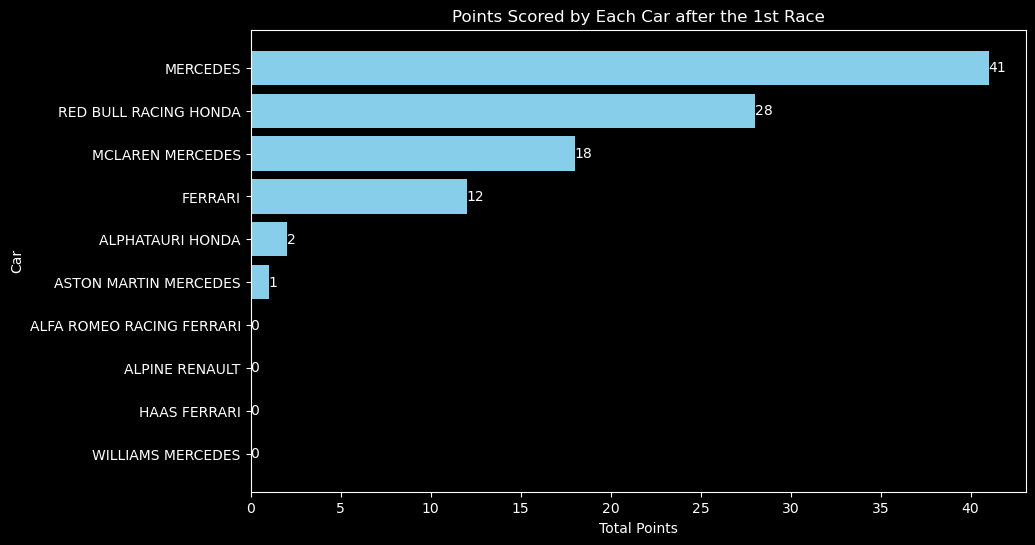

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file for the 1st race
race1_data = pd.read_csv("bahrain-2021.csv")

# Group the data by car and calculate the total points scored by each car
car_points = race1_data.groupby('CAR')['PTS'].sum().reset_index()

# Sort the data by total points in descending order
car_points_sorted = car_points.sort_values(by='PTS', ascending=False)

# Plot the points scored by each car
plt.figure(figsize=(10, 6))
bars = plt.barh(car_points_sorted['CAR'], car_points_sorted['PTS'], color='skyblue')

# Add total points above each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center')

plt.xlabel('Total Points')
plt.ylabel('Car')
plt.title('Points Scored by Each Car after the 1st Race')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest points at the top
plt.show()


In [15]:
import pandas as pd

# Read the CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Combine the dataframes for all races
all_races_data = pd.concat([race1_data, race2_data, race3_data, race4_data, race5_data])

# Group the combined dataframe by team and calculate the sum of points for each team
team_points = all_races_data.groupby('CAR')['PTS'].sum().reset_index()

# Display the total points earned by each team after 5 races
print(team_points)

                         CAR  PTS
0  ALFA ROMEO RACING FERRARI    1
1           ALPHATAURI HONDA   18
2             ALPINE RENAULT   17
3      ASTON MARTIN MERCEDES   19
4                    FERRARI   78
5               HAAS FERRARI    0
6           MCLAREN MERCEDES   80
7                   MERCEDES  148
8      RED BULL RACING HONDA  149
9          WILLIAMS MERCEDES    0


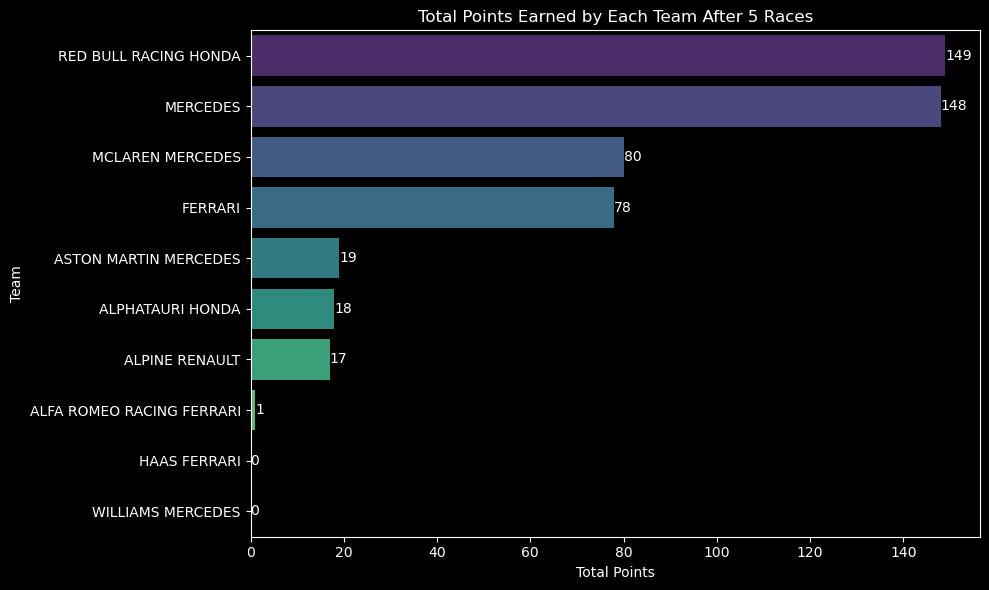

In [16]:
# Sort teams by total points
team_points = team_points.sort_values(by='PTS', ascending=False)

# Plot the total points earned by each team after 5 races
plt.figure(figsize=(10, 6))
sns.barplot(x='PTS', y='CAR', data=team_points, palette='viridis')
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.title('Total Points Earned by Each Team After 5 Races')
plt.grid(False)
plt.tight_layout()

# Add text labels for total points above each bar
for index, value in enumerate(team_points['PTS']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.show()

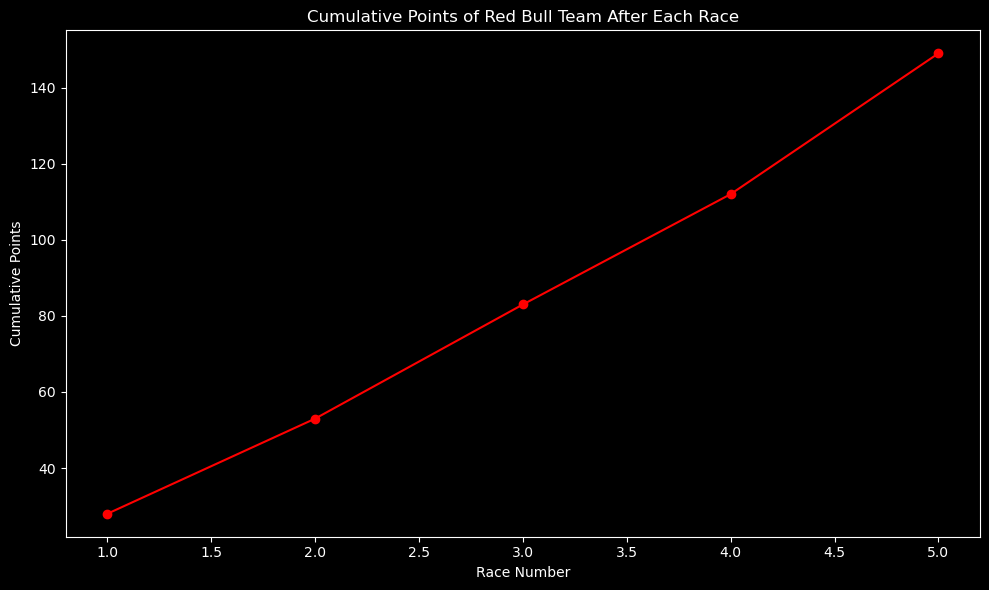

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Filter data for the Red Bull team in each race
red_bull_race1 = race1_data[race1_data['CAR'] == 'RED BULL RACING HONDA']
red_bull_race2 = race2_data[race2_data['CAR'] == 'RED BULL RACING HONDA']
red_bull_race3 = race3_data[race3_data['CAR'] == 'RED BULL RACING HONDA']
red_bull_race4 = race4_data[race4_data['CAR'] == 'RED BULL RACING HONDA']
red_bull_race5 = race5_data[race5_data['CAR'] == 'RED BULL RACING HONDA']

# Calculate cumulative sum of points for the Red Bull team after each race
red_bull_cumulative_points = [
    red_bull_race1['PTS'].sum(),
    red_bull_race1['PTS'].sum() + red_bull_race2['PTS'].sum(),
    red_bull_race1['PTS'].sum() + red_bull_race2['PTS'].sum() + red_bull_race3['PTS'].sum(),
    red_bull_race1['PTS'].sum() + red_bull_race2['PTS'].sum() + red_bull_race3['PTS'].sum() + red_bull_race4['PTS'].sum(),
    red_bull_race1['PTS'].sum() + red_bull_race2['PTS'].sum() + red_bull_race3['PTS'].sum() + red_bull_race4['PTS'].sum() + red_bull_race5['PTS'].sum()
]

# Plot a line graph for the cumulative points of the Red Bull team
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), red_bull_cumulative_points, marker='o', color='red', linestyle='-')
plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Red Bull Team After Each Race')
plt.grid(False)
plt.tight_layout()
plt.show()


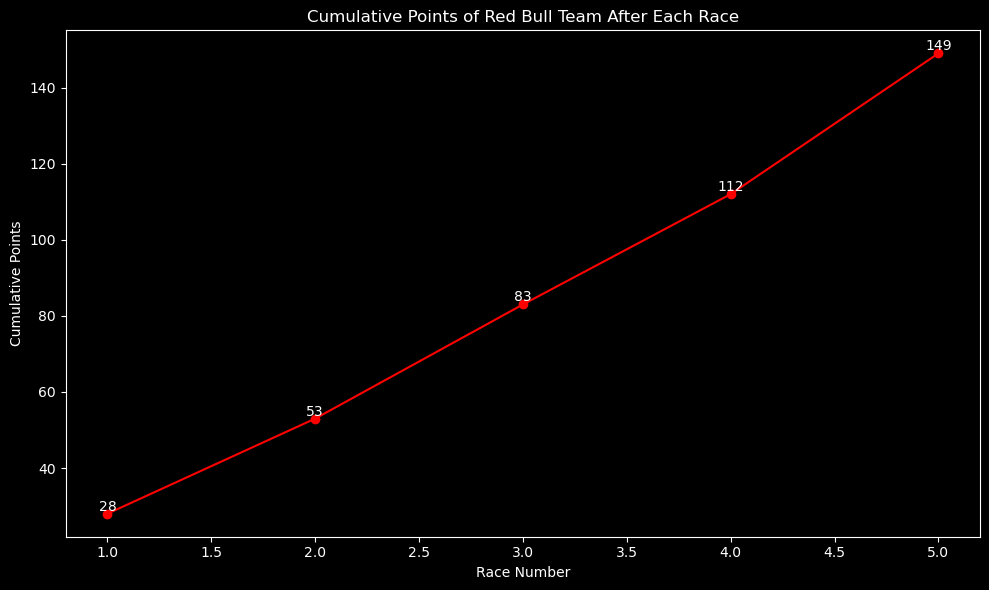

In [20]:
# Plot a line graph for the cumulative points of the Red Bull team
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), red_bull_cumulative_points, marker='o', color='red', linestyle='-')
plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Red Bull Team After Each Race')
plt.grid(False)

# Annotate points above each node
for i, points in enumerate(red_bull_cumulative_points):
    plt.text(i + 1, points, f'{points}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

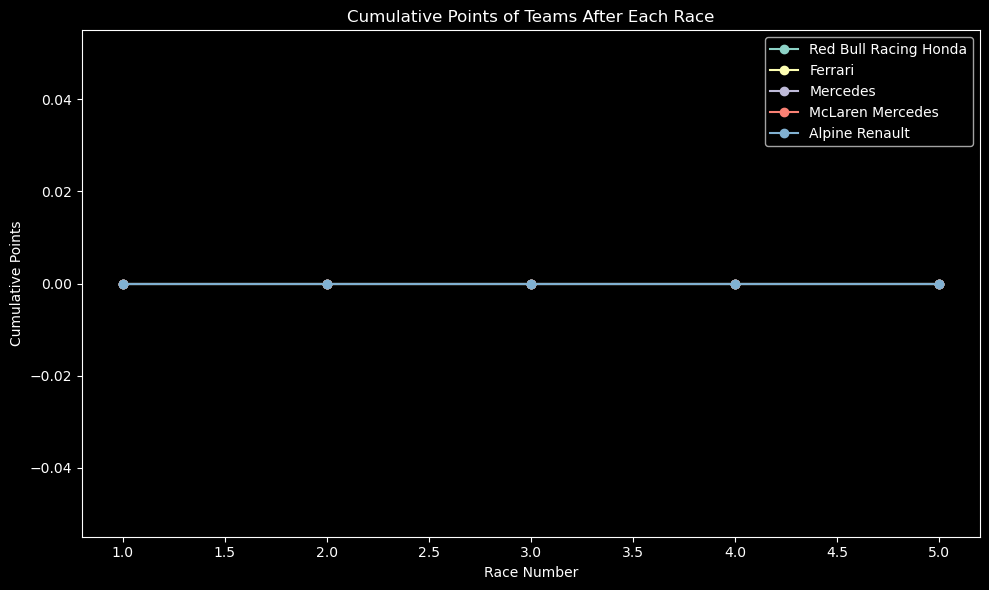

In [22]:
# Define a dictionary to store cumulative points for each team
teams_cumulative_points = {
    'Red Bull Racing Honda': [],
    'Ferrari': [],
    'Mercedes': [],
    'McLaren Mercedes': [],
    'Alpine Renault': []
}

# Iterate over each race
for i, race_data in enumerate([race1_data, race2_data, race3_data, race4_data, race5_data], start=1):
    # Iterate over each team
    for team, points_list in teams_cumulative_points.items():
        # Filter data for the current team in the current race
        team_data = race_data[race_data['CAR'] == team]
        # Calculate cumulative sum of points for the current team after each race
        cumulative_points = team_data['PTS'].sum()
        # Append cumulative points to the list
        points_list.append(cumulative_points)

# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(10, 6))
for team, points_list in teams_cumulative_points.items():
    plt.plot(range(1, 6), points_list, marker='o', label=team)

plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

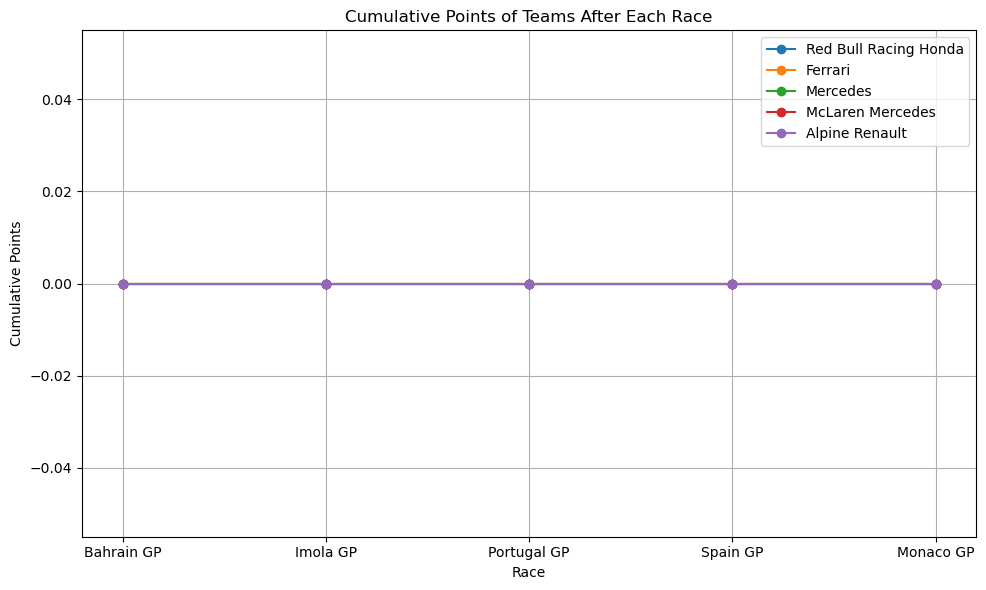

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

race_names = ['Bahrain GP', 'Imola GP', 'Portugal GP', 'Spain GP', 'Monaco GP']

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Define a dictionary to store cumulative points for each team
teams_cumulative_points = {
    'Red Bull Racing Honda': [],
    'Ferrari': [],
    'Mercedes': [],
    'McLaren Mercedes': [],
    'Alpine Renault': []
}

# Iterate over each race
for i, race_data in enumerate([race1_data, race2_data, race3_data, race4_data, race5_data]):
    # Iterate over each team
    for team, points_list in teams_cumulative_points.items():
        # Filter data for the current team in the current race
        team_data = race_data[race_data['CAR'] == team]
        # Calculate cumulative sum of points for the current team after each race
        cumulative_points = team_data['PTS'].sum()
        # Append cumulative points to the list
        points_list.append(cumulative_points)

# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(10, 6))
for team, points_list in teams_cumulative_points.items():
    plt.plot(race_names, points_list, marker='o', label=team)

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

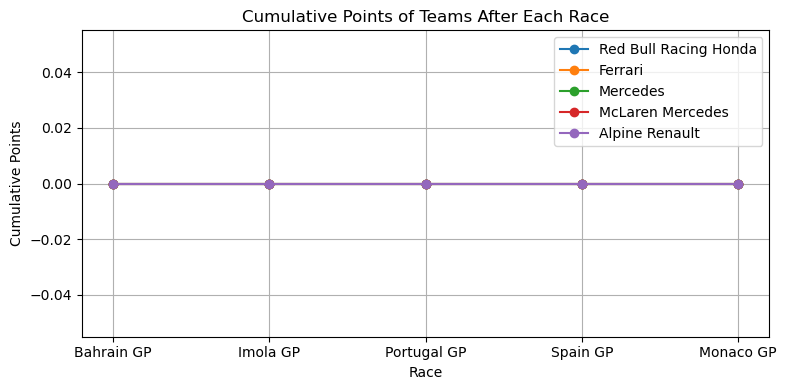

In [3]:
# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(8, 4))
for team, points_list in teams_cumulative_points.items():
    plt.plot(race_names, points_list, marker='o', label=team)

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

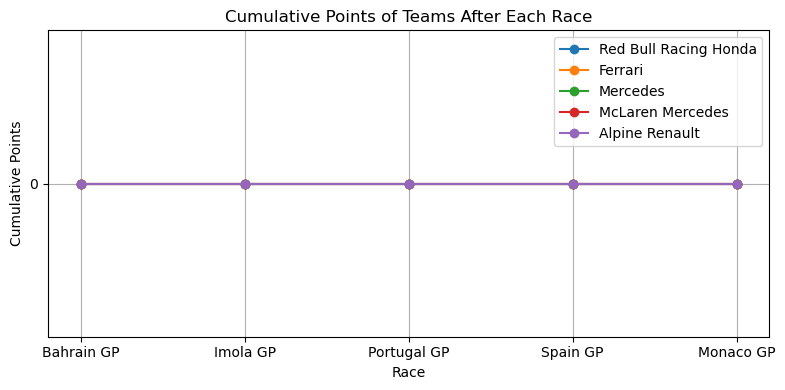

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define race names
race_names = ['Bahrain GP', 'Imola GP', 'Portugal GP', 'Spain GP', 'Monaco GP']

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Define a dictionary to store cumulative points for each team
teams_cumulative_points = {
    'Red Bull Racing Honda': [],
    'Ferrari': [],
    'Mercedes': [],
    'McLaren Mercedes': [],
    'Alpine Renault': []
}

# Iterate over each race
for i, race_data in enumerate([race1_data, race2_data, race3_data, race4_data, race5_data]):
    # Iterate over each team
    for team, points_list in teams_cumulative_points.items():
        # Filter data for the current team in the current race
        team_data = race_data[race_data['CAR'] == team]
        # Calculate cumulative sum of points for the current team after each race
        cumulative_points = team_data['PTS'].sum()
        # Append cumulative points to the list
        points_list.append(cumulative_points)

# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(8, 4))
for team, points_list in teams_cumulative_points.items():
    plt.plot(race_names, points_list, marker='o', label=team)

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(True)
plt.yticks(range(0, max([max(points) for points in teams_cumulative_points.values()]) + 1, 50))
plt.tight_layout()
plt.show()


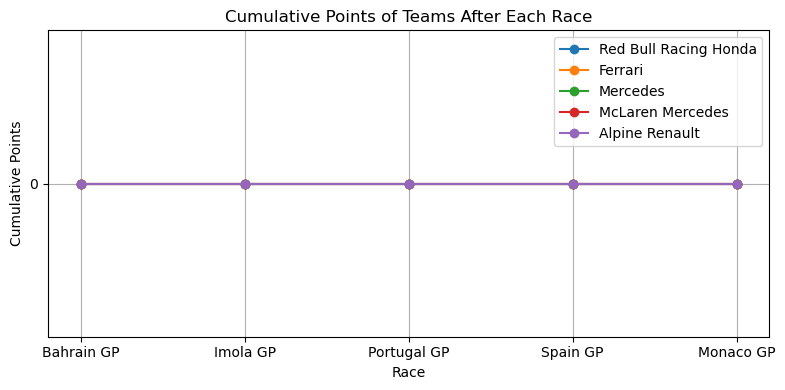

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define race names
race_names = ['Bahrain GP', 'Imola GP', 'Portugal GP', 'Spain GP', 'Monaco GP']

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Define a dictionary to store cumulative points for each team
teams_cumulative_points = {
    'Red Bull Racing Honda': [],
    'Ferrari': [],
    'Mercedes': [],
    'McLaren Mercedes': [],
    'Alpine Renault': []
}

# Iterate over each race
for i, race_data in enumerate([race1_data, race2_data, race3_data, race4_data, race5_data]):
    # Iterate over each team
    for team, points_list in teams_cumulative_points.items():
        # Filter data for the current team in the current race
        team_data = race_data[race_data['CAR'] == team]
        # Calculate cumulative sum of points for the current team after each race
        cumulative_points = team_data['PTS'].sum()
        # Append cumulative points to the list
        points_list.append(cumulative_points)

# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(8, 4))
for team, points_list in teams_cumulative_points.items():
    plt.plot(race_names, points_list, marker='o', label=team)

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(True)
plt.yticks(range(0, max([max(points) for points in teams_cumulative_points.values()]) + 1, 50))
plt.tight_layout()
plt.show()


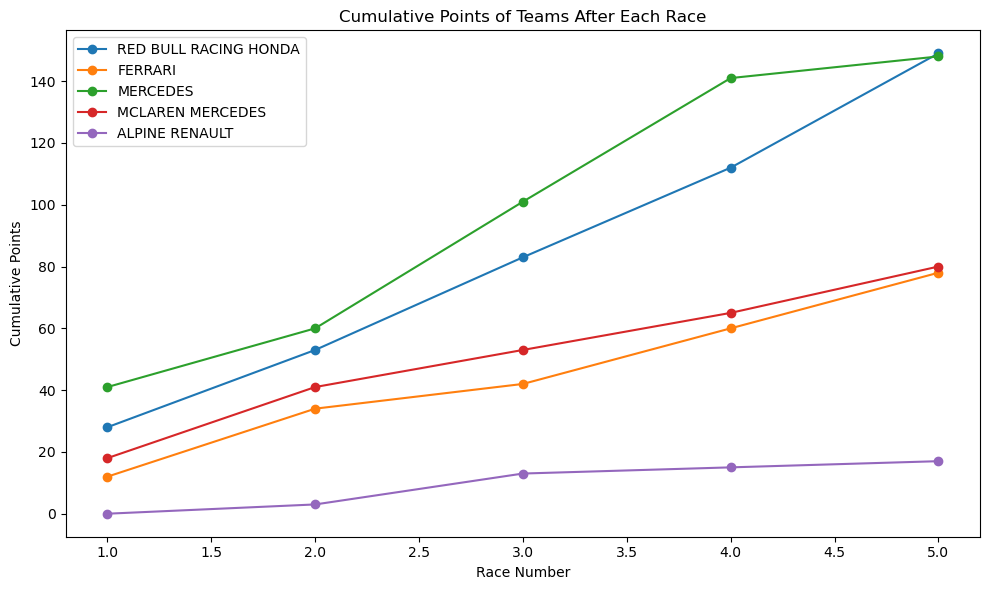

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Define a function to calculate cumulative points for a given team after each race
def calculate_cumulative_points(team_data):
    cumulative_points = []
    total_points = 0
    for race in [race1_data, race2_data, race3_data, race4_data, race5_data]:
        total_points += race[race['CAR'] == team_data]['PTS'].sum()
        cumulative_points.append(total_points)
    return cumulative_points

# Calculate cumulative points for each team
teams = ['RED BULL RACING HONDA', 'FERRARI', 'MERCEDES', 'MCLAREN MERCEDES', 'ALPINE RENAULT']
teams_cumulative_points = {}

for team in teams:
    teams_cumulative_points[team] = calculate_cumulative_points(team)

# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(10, 6))

for team, cumulative_points in teams_cumulative_points.items():
    plt.plot(range(1, 6), cumulative_points, marker='o', label=team)

plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


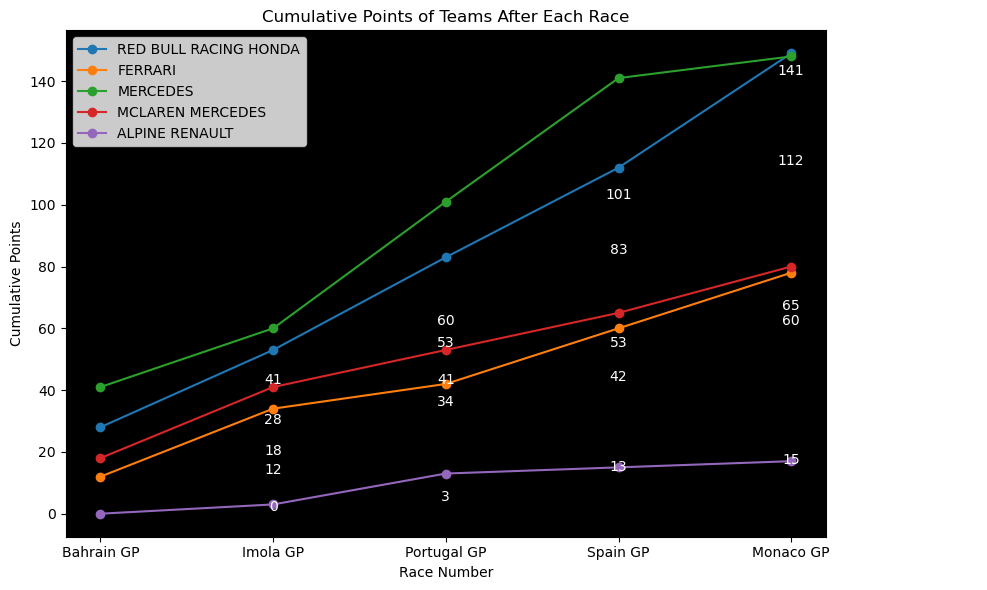

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define race names
race_names = ['Bahrain GP', 'Imola GP', 'Portugal GP', 'Spain GP', 'Monaco GP']

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Define a function to calculate cumulative points for a given team after each race
def calculate_cumulative_points(team_data):
    cumulative_points = []
    total_points = 0
    for race in [race1_data, race2_data, race3_data, race4_data, race5_data]:
        total_points += race[race['CAR'] == team_data]['PTS'].sum()
        cumulative_points.append(total_points)
    return cumulative_points

# Calculate cumulative points for each team
teams = ['RED BULL RACING HONDA', 'FERRARI', 'MERCEDES', 'MCLAREN MERCEDES', 'ALPINE RENAULT']
teams_cumulative_points = {}

for team in teams:
    teams_cumulative_points[team] = calculate_cumulative_points(team)

# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(10, 6))

for team, cumulative_points in teams_cumulative_points.items():
    plt.plot(race_names, cumulative_points, marker='o', label=team)

    # Annotate points above each node
    for x, y in zip(range(1, 6), cumulative_points):
        plt.text(x, y, f'{y}', ha='center', va='bottom', color='white')  # Displaying points over each node

plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('black')  # Setting black background
plt.tight_layout()
plt.show()


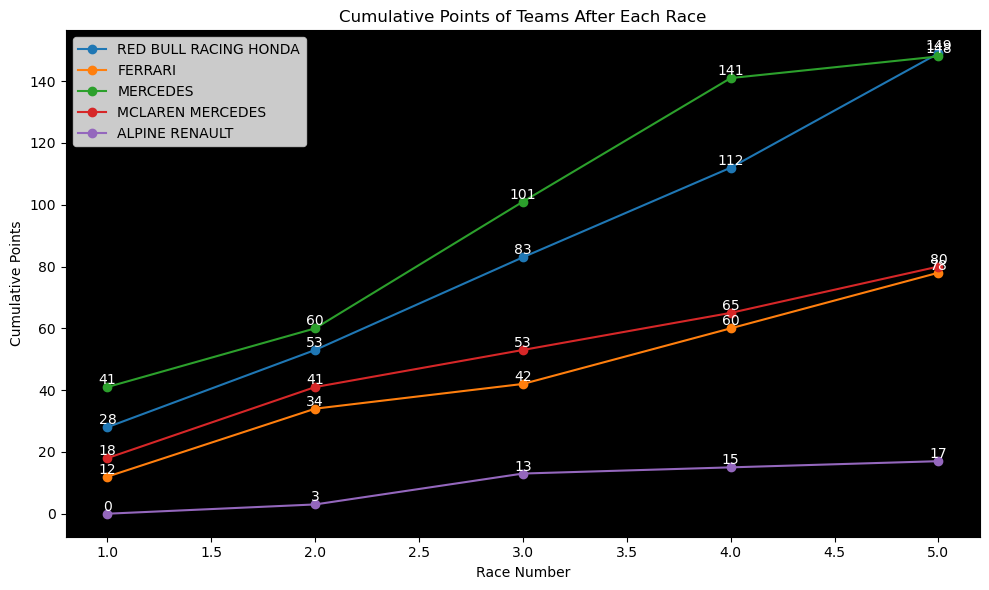

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Define a function to calculate cumulative points for a given team after each race
def calculate_cumulative_points(team_data):
    cumulative_points = []
    total_points = 0
    for race in [race1_data, race2_data, race3_data, race4_data, race5_data]:
        total_points += race[race['CAR'] == team_data]['PTS'].sum()
        cumulative_points.append(total_points)
    return cumulative_points

# Calculate cumulative points for each team
teams = ['RED BULL RACING HONDA', 'FERRARI', 'MERCEDES', 'MCLAREN MERCEDES', 'ALPINE RENAULT']
teams_cumulative_points = {}

for team in teams:
    teams_cumulative_points[team] = calculate_cumulative_points(team)

# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(10, 6))

for team, cumulative_points in teams_cumulative_points.items():
    plt.plot(range(1, 6), cumulative_points, marker='o', label=team)

    # Annotate points above each node
    for x, y in zip(range(1, 6), cumulative_points):
        plt.text(x, y, f'{y}', ha='center', va='bottom', color='white')  # Displaying points over each node

plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('black')  # Setting black background
plt.tight_layout()
plt.show()


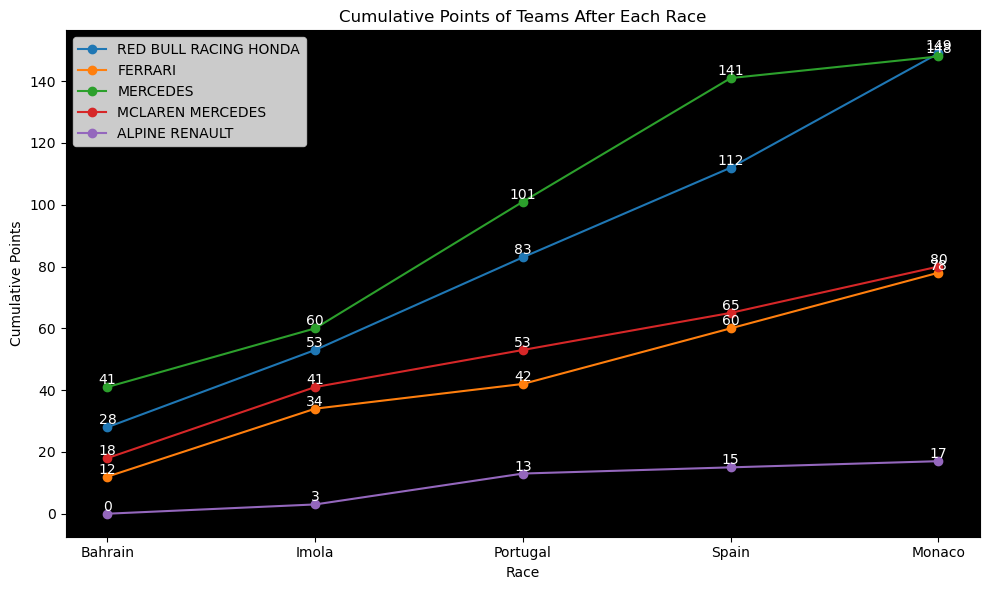

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

# Define a function to calculate cumulative points for a given team after each race
def calculate_cumulative_points(team_data):
    cumulative_points = []
    total_points = 0
    for race in [race1_data, race2_data, race3_data, race4_data, race5_data]:
        total_points += race[race['CAR'] == team_data]['PTS'].sum()
        cumulative_points.append(total_points)
    return cumulative_points

# Calculate cumulative points for each team
teams = ['RED BULL RACING HONDA', 'FERRARI', 'MERCEDES', 'MCLAREN MERCEDES', 'ALPINE RENAULT']
teams_cumulative_points = {}

for team in teams:
    teams_cumulative_points[team] = calculate_cumulative_points(team)

# Define race names
race_names = ['Bahrain', 'Imola', 'Portugal', 'Spain', 'Monaco']

# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(10, 6))

for team, cumulative_points in teams_cumulative_points.items():
    plt.plot(race_names, cumulative_points, marker='o', label=team)

    # Annotate points above each node
    for x, y in zip(race_names, cumulative_points):
        plt.text(x, y, f'{y}', ha='center', va='bottom', color='white')  # Displaying points over each node

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('black')  # Setting black background
plt.tight_layout()
plt.show()


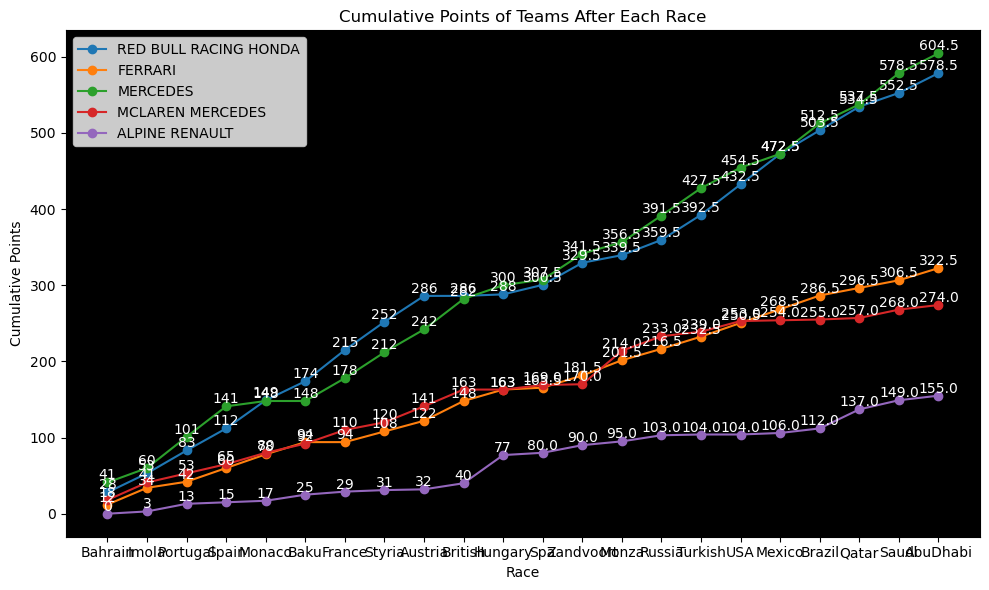

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

race6_data = pd.read_csv("baku-2021.csv")
race7_data = pd.read_csv("france-2021.csv")
race8_data = pd.read_csv("styria-2021.csv")
race9_data = pd.read_csv("austria-2021.csv")
race10_data = pd.read_csv("british-2021.csv")
race11_data = pd.read_csv("hungary-2021.csv")
race12_data = pd.read_csv("spa-2021.csv")
race13_data = pd.read_csv("zandvoort-2021.csv")
race14_data = pd.read_csv("monza-2021.csv")
race15_data = pd.read_csv("russia-2021.csv")
race16_data = pd.read_csv("turkish-2021.csv")
race17_data = pd.read_csv("usa-2021.csv")
race18_data = pd.read_csv("mexico-2021.csv")
race19_data = pd.read_csv("brazil-2021.csv")
race20_data = pd.read_csv("qatar-2021.csv")
race21_data = pd.read_csv("saudi-2021.csv")
race22_data = pd.read_csv("abudhabi-2021.csv")


# Define a function to calculate cumulative points for a given team after each race
def calculate_cumulative_points(team_data):
    cumulative_points = []
    total_points = 0
    for race in [race1_data, race2_data, race3_data, race4_data, race5_data, race6_data, race7_data, race8_data, race9_data
                , race10_data, race11_data, race12_data, race13_data, race14_data, race15_data, race16_data, race17_data, race18_data, race19_data, race20_data, race21_data, race22_data]:
        total_points += race[race['CAR'] == team_data]['PTS'].sum()
        cumulative_points.append(total_points)
    return cumulative_points

# Calculate cumulative points for each team
teams = ['RED BULL RACING HONDA', 'FERRARI', 'MERCEDES', 'MCLAREN MERCEDES', 'ALPINE RENAULT']
teams_cumulative_points = {}

for team in teams:
    teams_cumulative_points[team] = calculate_cumulative_points(team)

# Define race names
race_names = ['Bahrain', 'Imola', 'Portugal', 'Spain', 'Monaco', 'Baku', 'France', 'Styria', 'Austria', 'British', 'Hungary', 'Spa', 'Zandvoort', 'Monza', 'Russia', 'Turkish', 'USA', 'Mexico', 'Brazil', 'Qatar', 'Saudi','AbuDhabi']

# Plot a line graph for the cumulative points of each team after each race
plt.figure(figsize=(10, 6))

for team, cumulative_points in teams_cumulative_points.items():
    plt.plot(race_names, cumulative_points, marker='o', label=team)

    # Annotate points above each node
    for x, y in zip(race_names, cumulative_points):
        plt.text(x, y, f'{y}', ha='center', va='bottom', color='white')  # Displaying points over each node

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('black')  # Setting black background
plt.tight_layout()
plt.show()

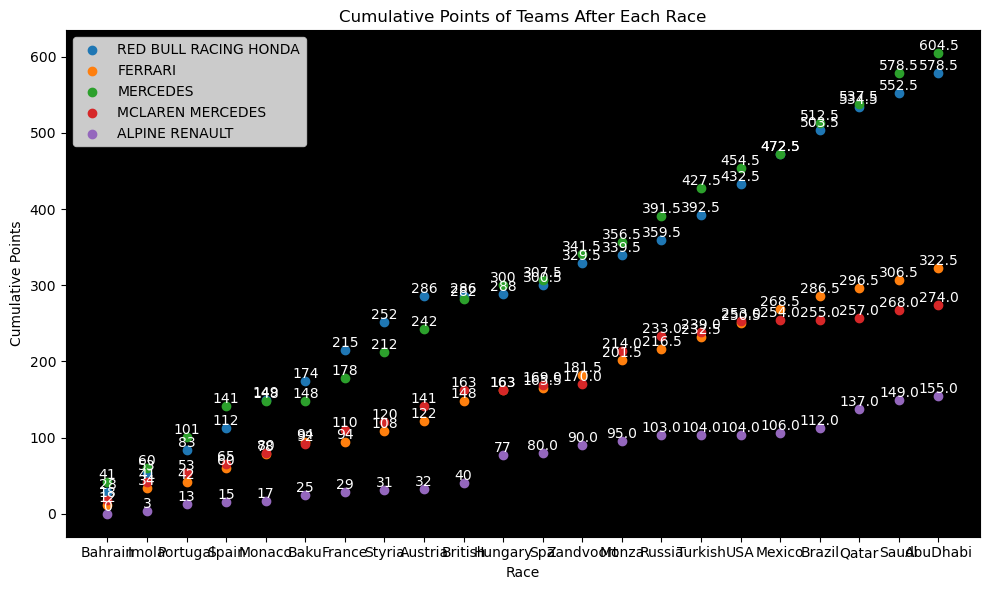

In [2]:
# Plot a scattered graph for the cumulative points of each team after each race
plt.figure(figsize=(10, 6))

for team, cumulative_points in teams_cumulative_points.items():
    plt.scatter(race_names, cumulative_points, label=team)

    # Annotate points above each node
    for x, y in zip(race_names, cumulative_points):
        plt.text(x, y, f'{y}', ha='center', va='bottom', color='white')  # Displaying points over each node

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('black')  # Setting black background
plt.tight_layout()
plt.show()

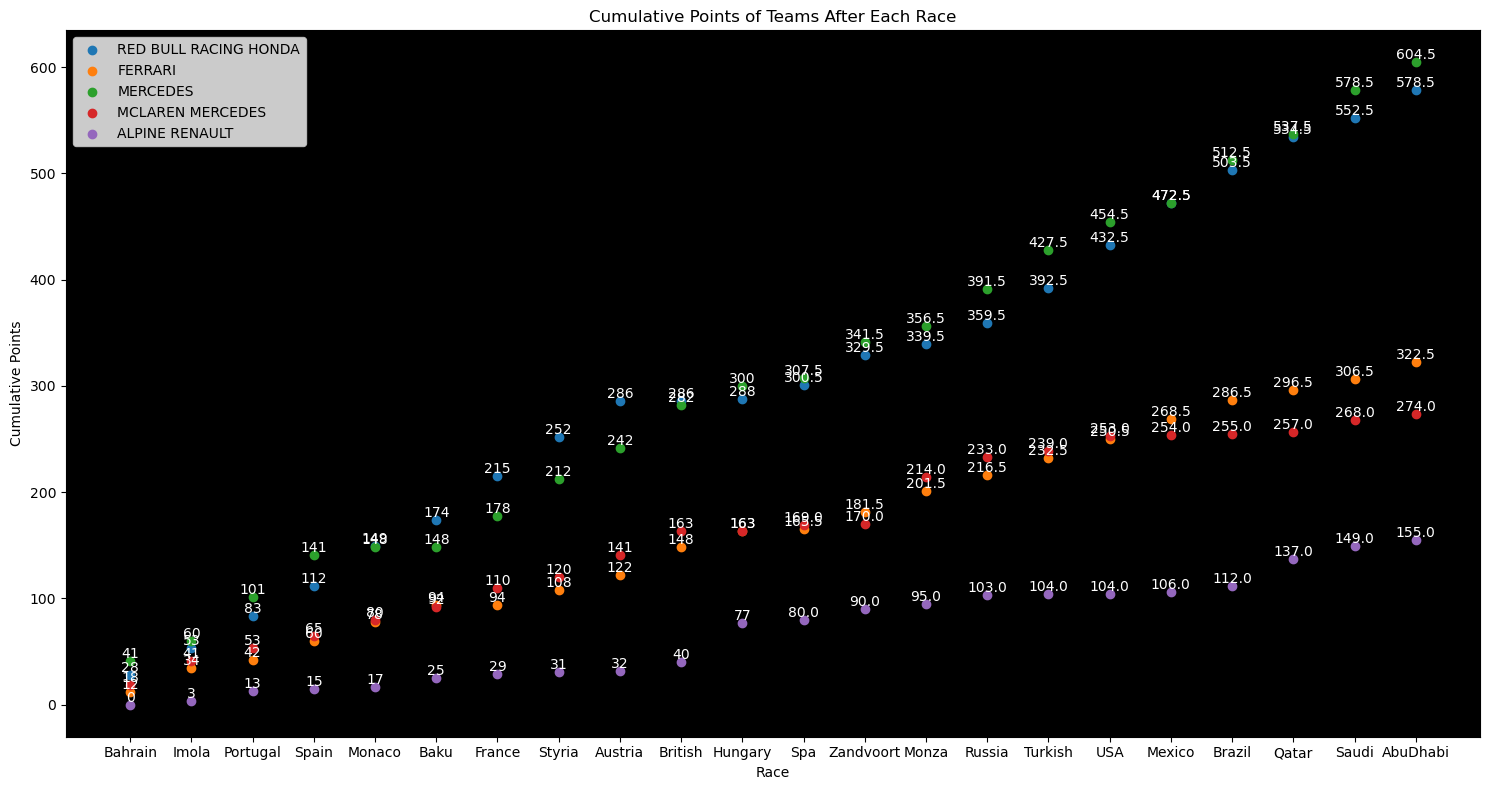

In [3]:
# Plot a scattered graph for the cumulative points of each team after each race
plt.figure(figsize=(15, 8))  # Adjust the figure size here

for team, cumulative_points in teams_cumulative_points.items():
    plt.scatter(race_names, cumulative_points, label=team)

    # Annotate points above each node
    for x, y in zip(race_names, cumulative_points):
        plt.text(x, y, f'{y}', ha='center', va='bottom', color='white')  # Displaying points over each node

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('black')  # Setting black background
plt.tight_layout()
plt.show()

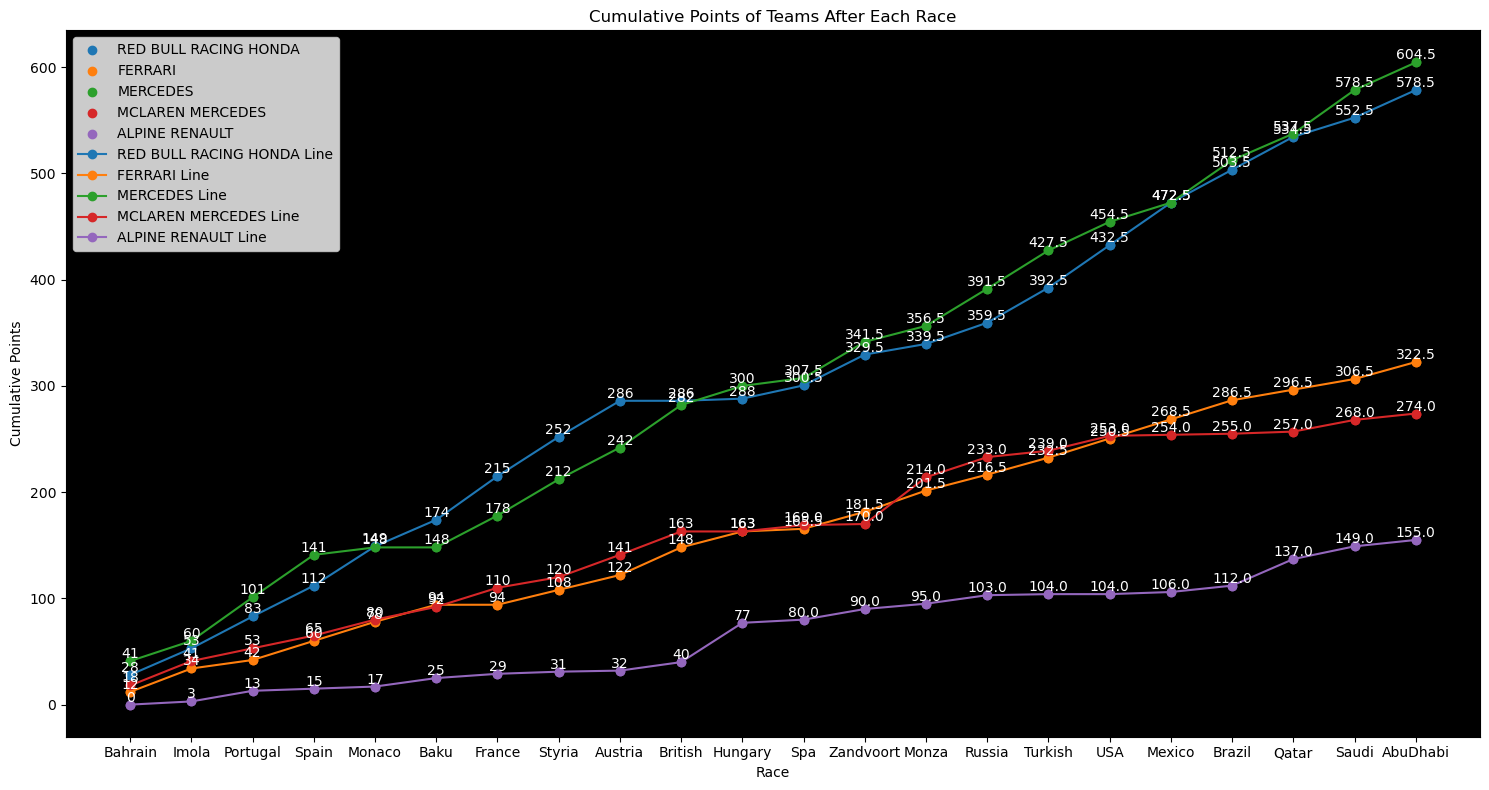

In [4]:
# Plot a scattered graph for the cumulative points of each team after each race
plt.figure(figsize=(15, 8))  # Adjust the figure size here

for team, cumulative_points in teams_cumulative_points.items():
    plt.scatter(race_names, cumulative_points, label=team)

    # Annotate points above each node
    for x, y in zip(race_names, cumulative_points):
        plt.text(x, y, f'{y}', ha='center', va='bottom', color='white')  # Displaying points over each node

# Plot a line graph for the cumulative points of each team after each race
for team, cumulative_points in teams_cumulative_points.items():
    plt.plot(race_names, cumulative_points, marker='o', label=team + ' Line')

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Teams After Each Race')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('black')  # Setting black background
plt.tight_layout()
plt.show()

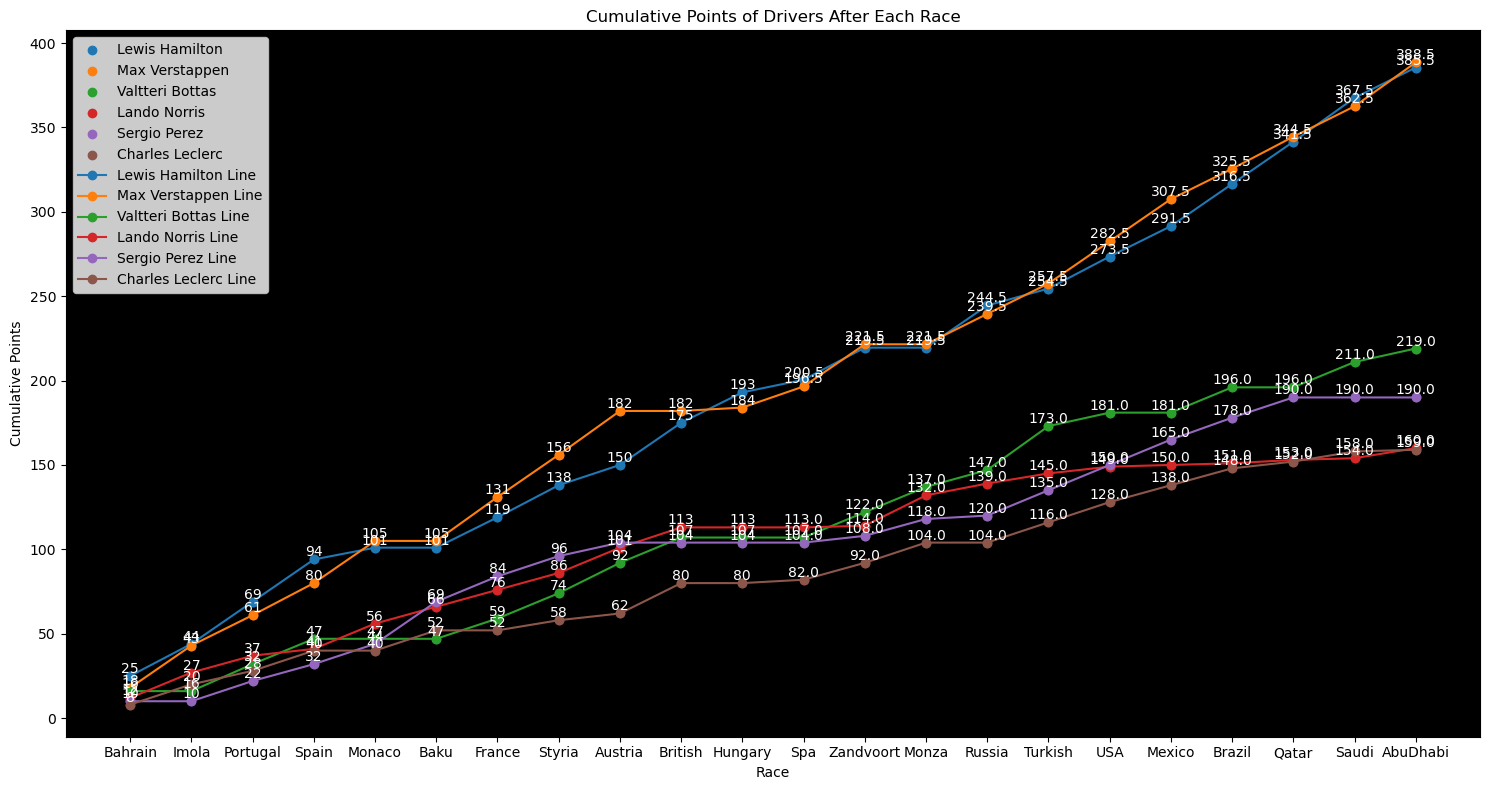

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

race6_data = pd.read_csv("baku-2021.csv")
race7_data = pd.read_csv("france-2021.csv")
race8_data = pd.read_csv("styria-2021.csv")
race9_data = pd.read_csv("austria-2021.csv")
race10_data = pd.read_csv("british-2021.csv")
race11_data = pd.read_csv("hungary-2021.csv")
race12_data = pd.read_csv("spa-2021.csv")
race13_data = pd.read_csv("zandvoort-2021.csv")
race14_data = pd.read_csv("monza-2021.csv")
race15_data = pd.read_csv("russia-2021.csv")
race16_data = pd.read_csv("turkish-2021.csv")
race17_data = pd.read_csv("usa-2021.csv")
race18_data = pd.read_csv("mexico-2021.csv")
race19_data = pd.read_csv("brazil-2021.csv")
race20_data = pd.read_csv("qatar-2021.csv")
race21_data = pd.read_csv("saudi-2021.csv")
race22_data = pd.read_csv("abudhabi-2021.csv")


# Define a function to calculate cumulative points for a given driver after each race
def calculate_cumulative_points(driver_data):
    cumulative_points = []
    total_points = 0
    for race in [race1_data, race2_data, race3_data, race4_data, race5_data, race6_data, race7_data, race8_data, race9_data
                , race10_data, race11_data, race12_data, race13_data, race14_data, race15_data, race16_data, race17_data, race18_data, race19_data, race20_data, race21_data, race22_data]:
        total_points += race[race['DRIVER'] == driver_data]['PTS'].sum()
        cumulative_points.append(total_points)
    return cumulative_points

# Calculate cumulative points for each driver
drivers = ['Lewis Hamilton', 'Max Verstappen', 'Valtteri Bottas', 'Lando Norris', 'Sergio Perez', 'Charles Leclerc']
drivers_cumulative_points = {}

for driver in drivers:
    drivers_cumulative_points[driver] = calculate_cumulative_points(driver)

# Define race names
race_names = ['Bahrain', 'Imola', 'Portugal', 'Spain', 'Monaco', 'Baku', 'France', 'Styria', 'Austria', 'British', 'Hungary', 'Spa', 'Zandvoort', 'Monza', 'Russia', 'Turkish', 'USA', 'Mexico', 'Brazil', 'Qatar', 'Saudi','AbuDhabi']

# Plot a scattered graph for the cumulative points of each driver after each race
plt.figure(figsize=(15, 8))  # Adjust the figure size here

for driver, cumulative_points in drivers_cumulative_points.items():
    plt.scatter(race_names, cumulative_points, label=driver)

    # Annotate points above each node
    for x, y in zip(race_names, cumulative_points):
        plt.text(x, y, f'{y}', ha='center', va='bottom', color='white')  # Displaying points over each node

# Plot a line graph for the cumulative points of each driver after each race
for driver, cumulative_points in drivers_cumulative_points.items():
    plt.plot(race_names, cumulative_points, marker='o', label=driver + ' Line')

plt.xlabel('Race')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Drivers After Each Race')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('black')  # Setting black background
plt.tight_layout()
plt.show()


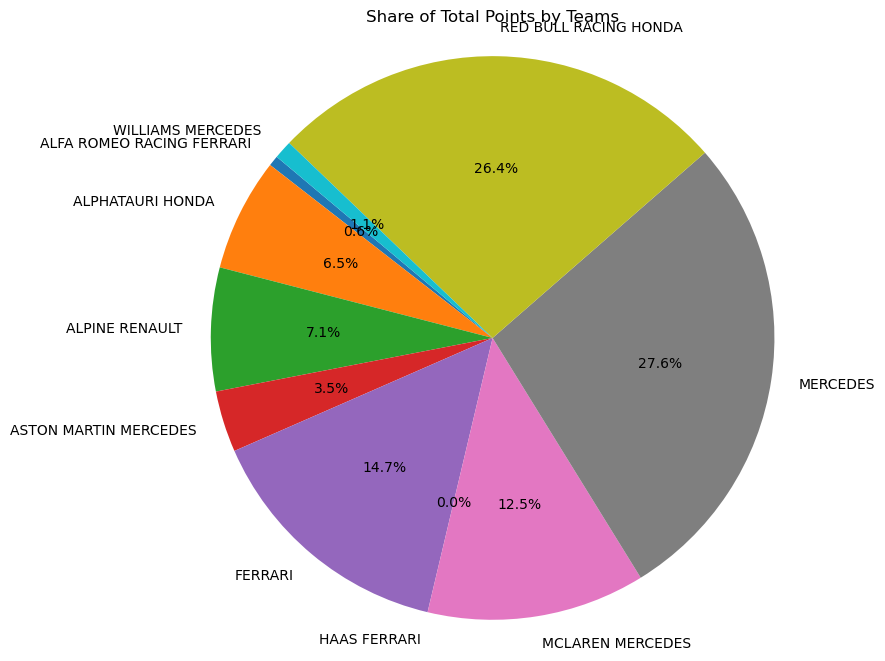

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for each race
race1_data = pd.read_csv("bahrain-2021.csv")
race2_data = pd.read_csv("imola-2021.csv")
race3_data = pd.read_csv("portugal-2021.csv")
race4_data = pd.read_csv("spain-2021.csv")
race5_data = pd.read_csv("monaco-2021.csv")

race6_data = pd.read_csv("baku-2021.csv")
race7_data = pd.read_csv("france-2021.csv")
race8_data = pd.read_csv("styria-2021.csv")
race9_data = pd.read_csv("austria-2021.csv")
race10_data = pd.read_csv("british-2021.csv")
race11_data = pd.read_csv("hungary-2021.csv")
race12_data = pd.read_csv("spa-2021.csv")
race13_data = pd.read_csv("zandvoort-2021.csv")
race14_data = pd.read_csv("monza-2021.csv")
race15_data = pd.read_csv("russia-2021.csv")
race16_data = pd.read_csv("turkish-2021.csv")
race17_data = pd.read_csv("usa-2021.csv")
race18_data = pd.read_csv("mexico-2021.csv")
race19_data = pd.read_csv("brazil-2021.csv")
race20_data = pd.read_csv("qatar-2021.csv")
race21_data = pd.read_csv("saudi-2021.csv")
race22_data = pd.read_csv("abudhabi-2021.csv")

# Combine all race data into a single DataFrame
all_race_data = pd.concat([race1_data, race2_data, race3_data, race4_data, race5_data,
                           race6_data, race7_data, race8_data, race9_data, race10_data,
                           race11_data, race12_data, race13_data, race14_data, race15_data,
                           race16_data, race17_data, race18_data, race19_data, race20_data,
                           race21_data, race22_data])

# Calculate total points earned by each team
team_total_points = all_race_data.groupby('CAR')['PTS'].sum()

# Compute percentage share of each team's total points
total_points = team_total_points.sum()
team_percentages = (team_total_points / total_points) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(team_percentages, labels=team_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Total Points by Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [3]:
# Calculate the sum of points scored by each team
team_points_sum = all_race_data.groupby('CAR')['PTS'].sum()

print(team_points_sum)

CAR
ALFA ROMEO RACING FERRARI     13.0
ALPHATAURI HONDA             142.0
ALPINE RENAULT               155.0
ASTON MARTIN MERCEDES         77.0
FERRARI                      322.5
HAAS FERRARI                   0.0
MCLAREN MERCEDES             274.0
MERCEDES                     604.5
RED BULL RACING HONDA        578.5
WILLIAMS MERCEDES             23.0
Name: PTS, dtype: float64


In [4]:
# Calculate the sum of points scored by all teams combined
total_points_sum = all_race_data['PTS'].sum()

print("Total points scored by all teams combined:", total_points_sum)

Total points scored by all teams combined: 2189.5


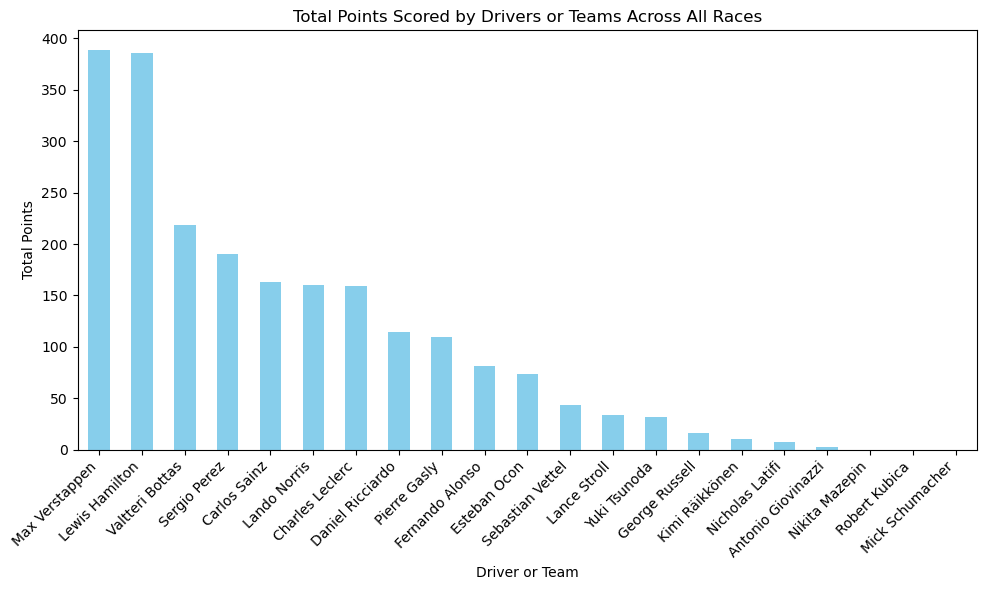

In [5]:
# Calculate total points scored by each driver or team
total_points = all_race_data.groupby('DRIVER')['PTS'].sum()

# Sort the drivers or teams based on total points in descending order
total_points_sorted = total_points.sort_values(ascending=False)

# Plot a bar chart for the top drivers or teams
plt.figure(figsize=(10, 6))
total_points_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Driver or Team')
plt.ylabel('Total Points')
plt.title('Total Points Scored by Drivers or Teams Across All Races')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

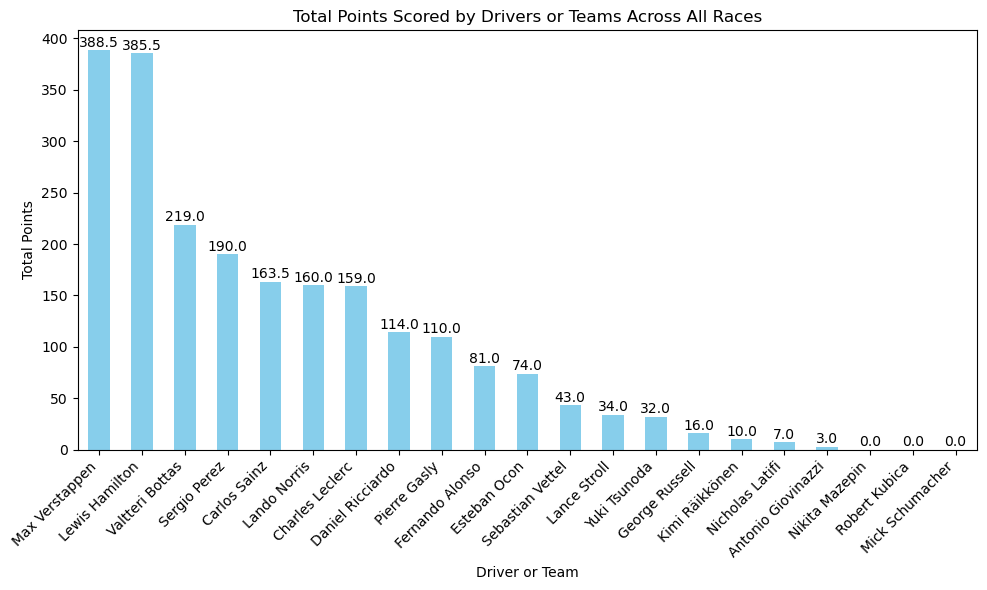

In [6]:
# Plot a bar chart for the top drivers or teams
plt.figure(figsize=(10, 6))
bar_plot = total_points_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Driver or Team')
plt.ylabel('Total Points')
plt.title('Total Points Scored by Drivers or Teams Across All Races')

# Annotate each bar with its respective total points
for i, value in enumerate(total_points_sorted):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

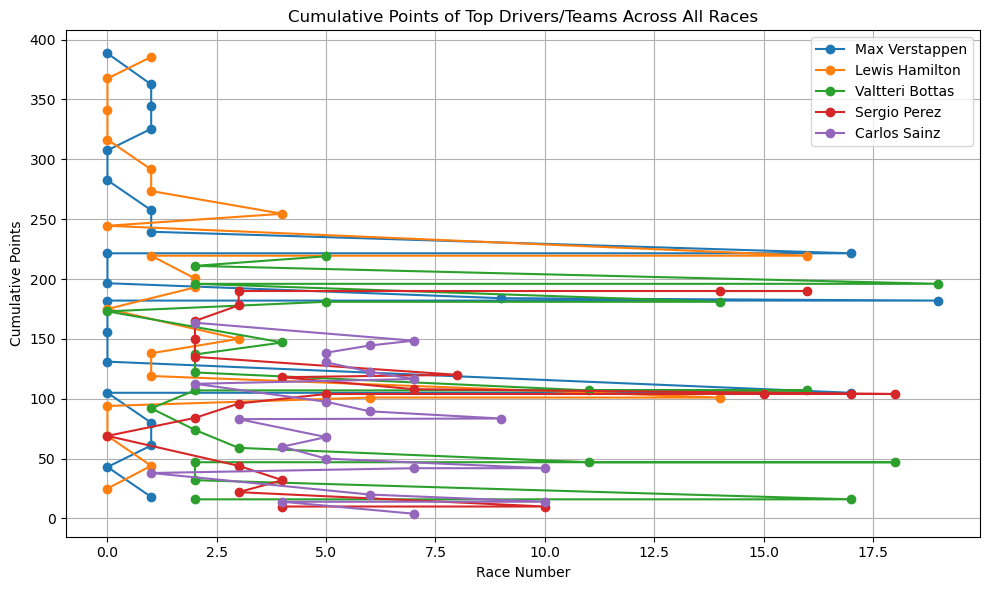

In [8]:
# Calculate cumulative points for each driver or team
cumulative_points = all_race_data.groupby(['DRIVER', 'CAR'])['PTS'].cumsum()

# Add cumulative points to the dataframe
all_race_data['Cumulative Points'] = cumulative_points

# Select the top drivers or teams based on their total points
top_drivers = all_race_data.groupby('DRIVER')['Cumulative Points'].max().nlargest(5)

# Plot a line graph for the cumulative points of top drivers or teams
plt.figure(figsize=(10, 6))
for driver in top_drivers.index:
    driver_data = all_race_data[all_race_data['DRIVER'] == driver]
    plt.plot(driver_data.index, driver_data['Cumulative Points'], marker='o', label=driver)

plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.title('Cumulative Points of Top Drivers/Teams Across All Races')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

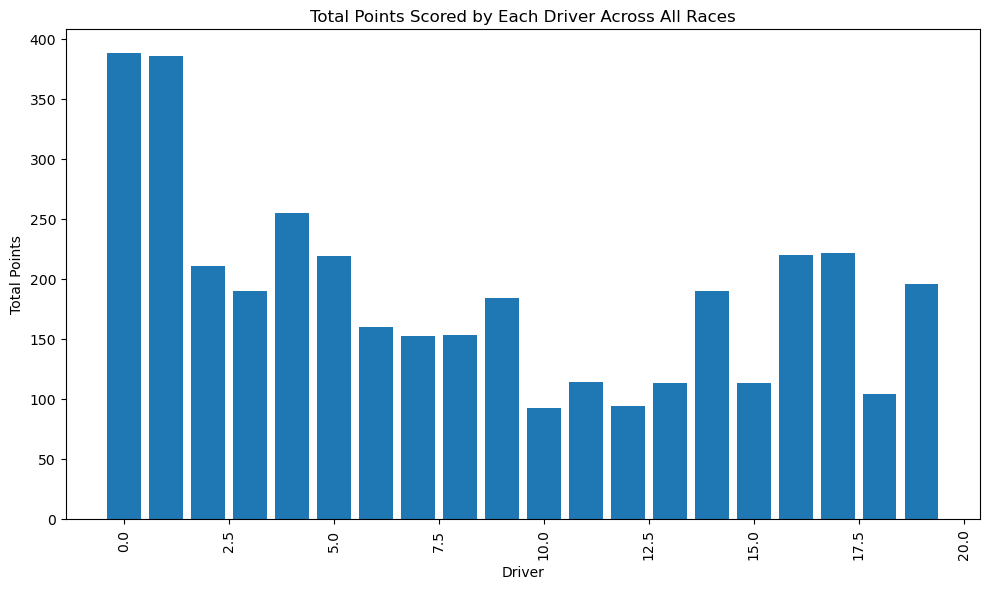

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read all race data CSV files
file_paths = [
    "bahrain-2021.csv", "imola-2021.csv", "portugal-2021.csv", "spain-2021.csv", "monaco-2021.csv",
    "baku-2021.csv", "france-2021.csv", "styria-2021.csv", "austria-2021.csv", "british-2021.csv",
    "hungary-2021.csv", "spa-2021.csv", "zandvoort-2021.csv", "monza-2021.csv", "russia-2021.csv",
    "turkish-2021.csv", "usa-2021.csv", "mexico-2021.csv", "brazil-2021.csv", "qatar-2021.csv",
    "saudi-2021.csv", "abudhabi-2021.csv"
]

race_data = pd.concat([pd.read_csv(file) for file in file_paths])

# Calculate cumulative points for each driver across all races
cumulative_points = race_data.groupby('DRIVER')['PTS'].cumsum()

# Visualize total points scored by each driver
plt.figure(figsize=(10, 6))
plt.bar(cumulative_points.index, cumulative_points.values)
plt.xlabel('Driver')
plt.ylabel('Total Points')
plt.title('Total Points Scored by Each Driver Across All Races')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read all race data CSV files
file_paths = [
    "bahrain-2021.csv", "imola-2021.csv", "portugal-2021.csv", "spain-2021.csv", "monaco-2021.csv",
    "baku-2021.csv", "france-2021.csv", "styria-2021.csv", "austria-2021.csv", "british-2021.csv",
    "hungary-2021.csv", "spa-2021.csv", "zandvoort-2021.csv", "monza-2021.csv", "russia-2021.csv",
    "turkish-2021.csv", "usa-2021.csv", "mexico-2021.csv", "brazil-2021.csv", "qatar-2021.csv",
    "saudi-2021.csv", "abudhabi-2021.csv"
]

race_data = pd.concat([pd.read_csv(file) for file in file_paths])

# Group data by race and driver/team, then calculate total points
race_summary = race_data.groupby(['RACE', 'DRIVER'])['PTS'].sum().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 8))
race_summary.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Race')
plt.ylabel('Points')
plt.title('Distribution of Points Scored by Drivers/Teams in Each Race')
plt.legend(title='Driver/Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


KeyError: 'RACE'

/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_38744/910220800.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  driver_summary = race_data.groupby(['DRIVER']).sum()


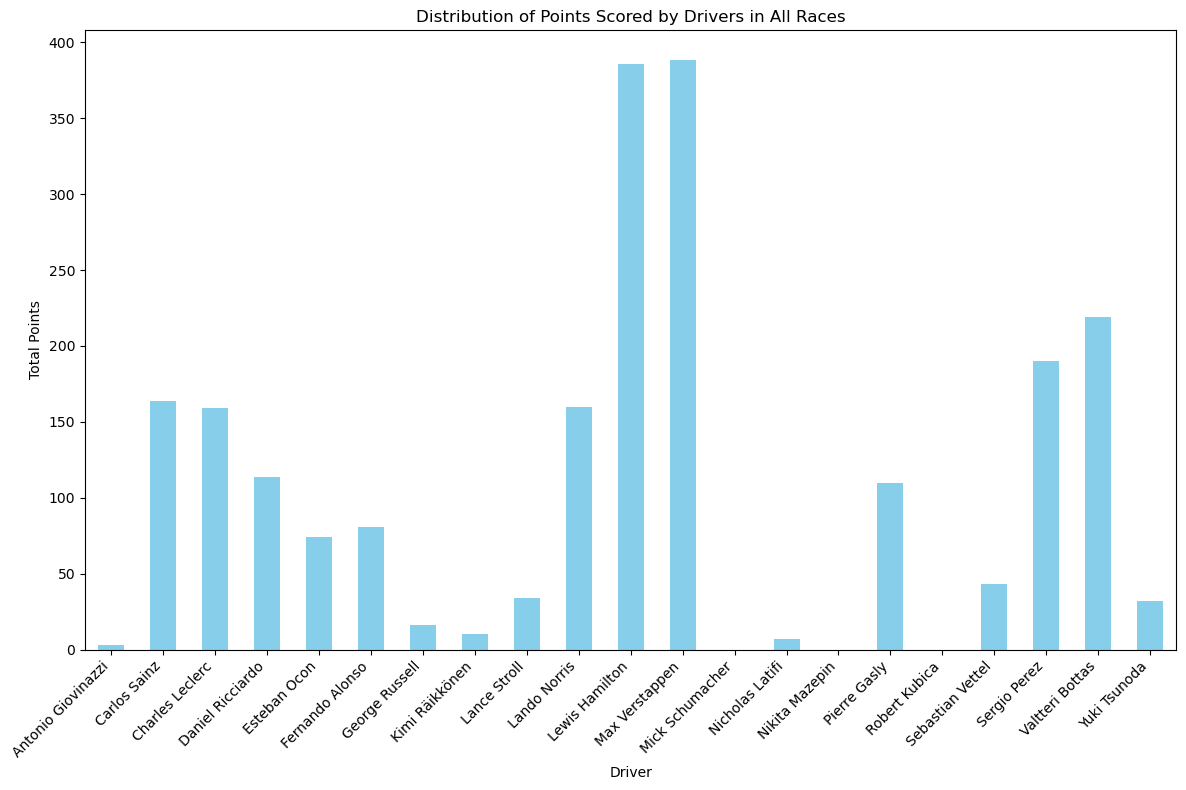

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read all race data CSV files
file_paths = [
    "bahrain-2021.csv", "imola-2021.csv", "portugal-2021.csv", "spain-2021.csv", "monaco-2021.csv",
    "baku-2021.csv", "france-2021.csv", "styria-2021.csv", "austria-2021.csv", "british-2021.csv",
    "hungary-2021.csv", "spa-2021.csv", "zandvoort-2021.csv", "monza-2021.csv", "russia-2021.csv",
    "turkish-2021.csv", "usa-2021.csv", "mexico-2021.csv", "brazil-2021.csv", "qatar-2021.csv",
    "saudi-2021.csv", "abudhabi-2021.csv"
]

race_data = pd.concat([pd.read_csv(file) for file in file_paths])

# Group data by driver and race, then calculate total points
driver_summary = race_data.groupby(['DRIVER']).sum()

# Plot stacked bar chart
plt.figure(figsize=(12, 8))
driver_summary['PTS'].plot(kind='bar', color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Total Points')
plt.title('Distribution of Points Scored by Drivers in All Races')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read all race data CSV files
file_paths = [
    "bahrain-2021.csv", "imola-2021.csv", "portugal-2021.csv", "spain-2021.csv", "monaco-2021.csv",
    "baku-2021.csv", "france-2021.csv", "styria-2021.csv", "austria-2021.csv", "british-2021.csv",
    "hungary-2021.csv", "spa-2021.csv", "zandvoort-2021.csv", "monza-2021.csv", "russia-2021.csv",
    "turkish-2021.csv", "usa-2021.csv", "mexico-2021.csv", "brazil-2021.csv", "qatar-2021.csv",
    "saudi-2021.csv", "abudhabi-2021.csv"
]

race_data = pd.concat([pd.read_csv(file) for file in file_paths])

# Determine winners of each race
race_winners = race_data.groupby('RACE')['DRIVER'].first().value_counts()

# Plot bar chart for win rate
plt.figure(figsize=(12, 8))
race_winners.plot(kind='bar', color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Drivers in All Races')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


KeyError: 'RACE'

IndexError: index 0 is out of bounds for axis 0 with size 0

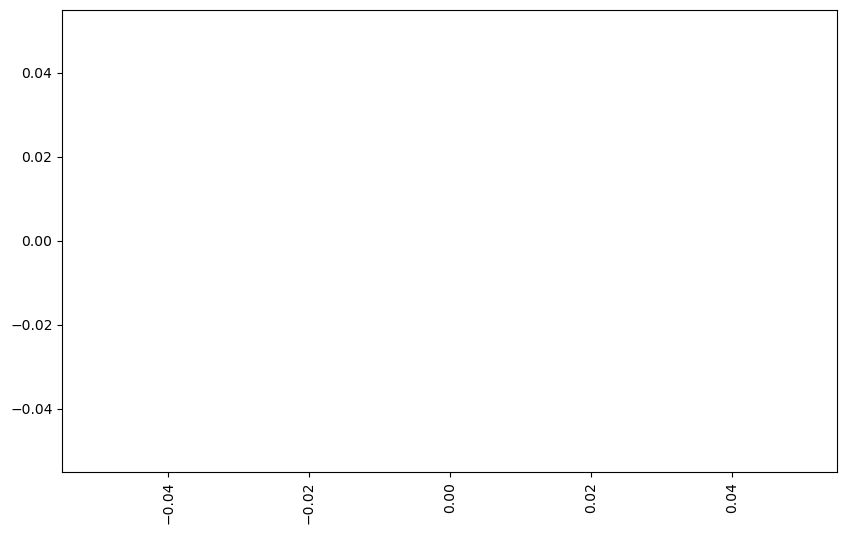

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("races-2021.csv")

# Filter data to include only the rows where a driver or team finished in the 1st position
winners = data[data['POS'] == 1]

# Count the number of wins for each driver or team
win_counts = winners['DRIVER'].value_counts()

# Plot the win rate using a bar chart
plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='skyblue')
plt.title('Win Rate of Drivers/Teams')
plt.xlabel('Driver/Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("races-2021.csv")

# Filter data to include only the rows where a driver or team finished in the 1st position
winners = data[data['POS'] == 1]

# Check if there are any winners
if winners.empty:
    print("There are no winners in the dataset.")
else:
    # Count the number of wins for each driver or team
    win_counts = winners['DRIVER'].value_counts()

    # Plot the win rate using a bar chart
    plt.figure(figsize=(10, 6))
    win_counts.plot(kind='bar', color='skyblue')
    plt.title('Win Rate of Drivers/Teams')
    plt.xlabel('Driver/Team')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


There are no winners in the dataset.


IndexError: index 0 is out of bounds for axis 0 with size 0

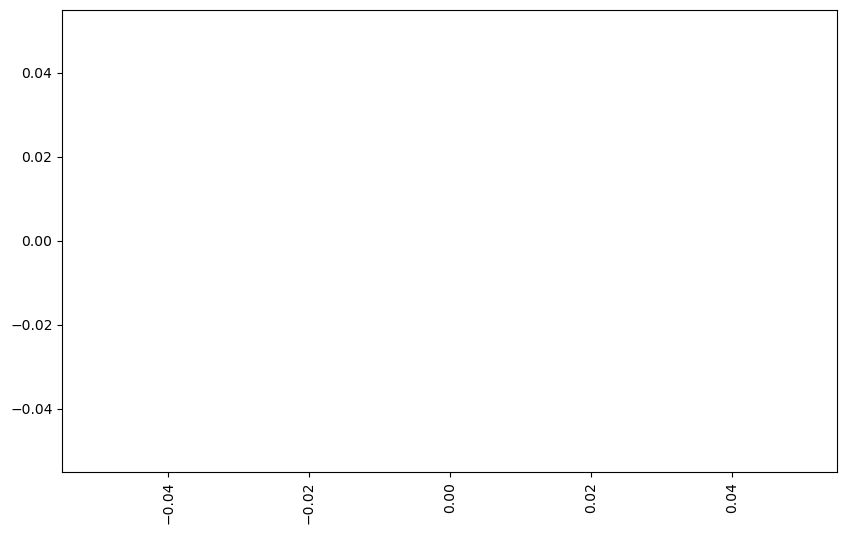

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("/Users/miteshramteke/Downloads/F1 dataset/2021 /races-2021.csv")

# Filter data to include only the rows where a driver or team finished in the 1st position
winners = data[data['POS'] == 1]

# Count the number of wins for each driver or team
win_counts = winners.groupby(['DRIVER', 'CAR'])['SEQ'].count()

# Plot the win rate using a bar chart
plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='skyblue')
plt.title('Win Rate of Drivers/Teams')
plt.xlabel('Driver/Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


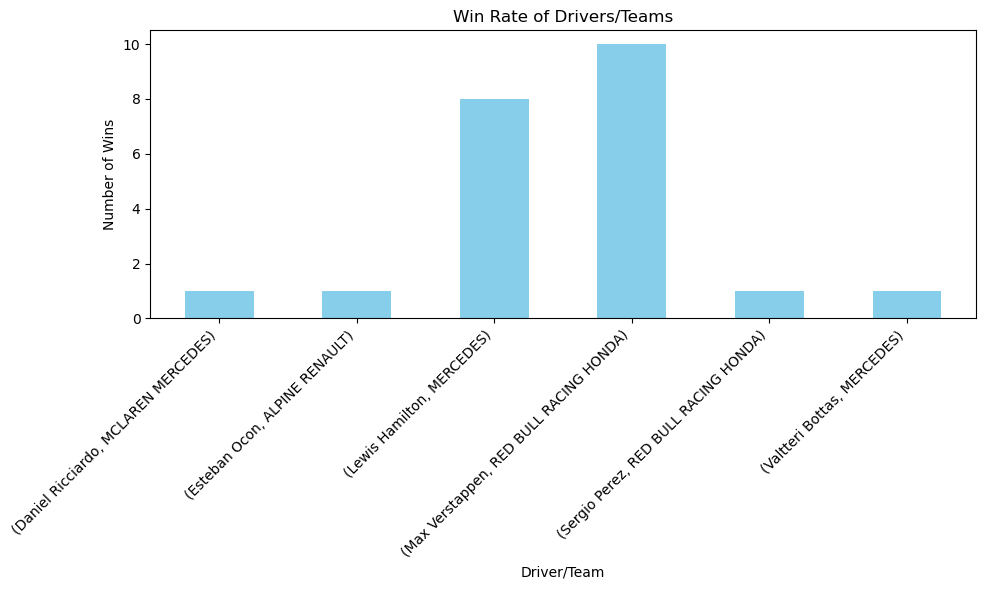

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("/Users/miteshramteke/Downloads/F1 dataset/2021 /races-2021new.csv")

# Filter data to include only the rows where a driver or team finished in the 1st position
winners = data[data['POS'] == 1]

# Count the number of wins for each driver or team
win_counts = winners.groupby(['DRIVER', 'CAR'])['SEQ'].nunique()

# Plot the win rate using a bar chart
plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='skyblue')
plt.title('Win Rate of Drivers/Teams')
plt.xlabel('Driver/Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


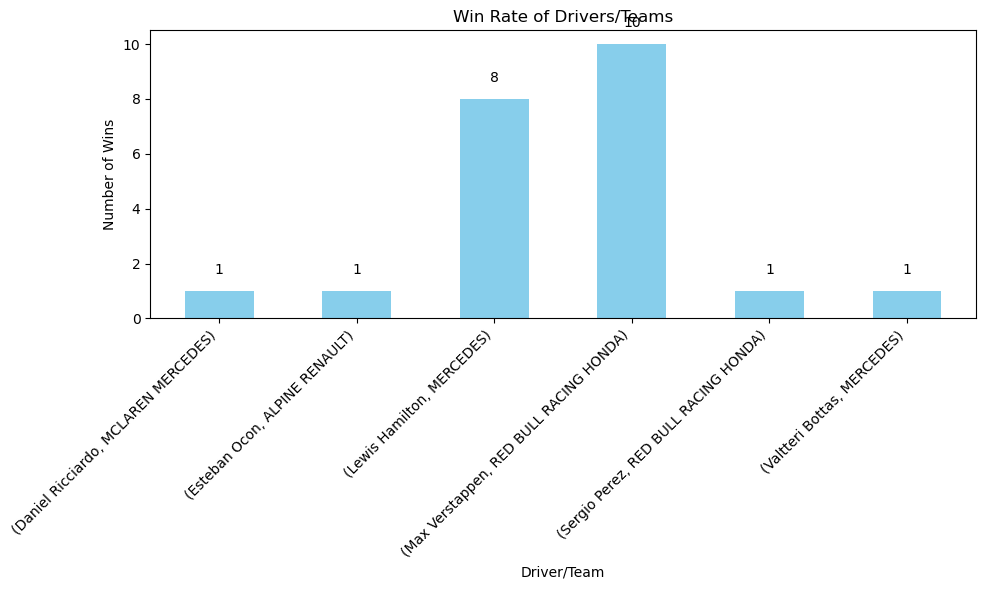

In [20]:
# Plot the win rate using a bar chart
plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='skyblue')
plt.title('Win Rate of Drivers/Teams')
plt.xlabel('Driver/Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')

# Display the number of wins over each bar
for i, v in enumerate(win_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

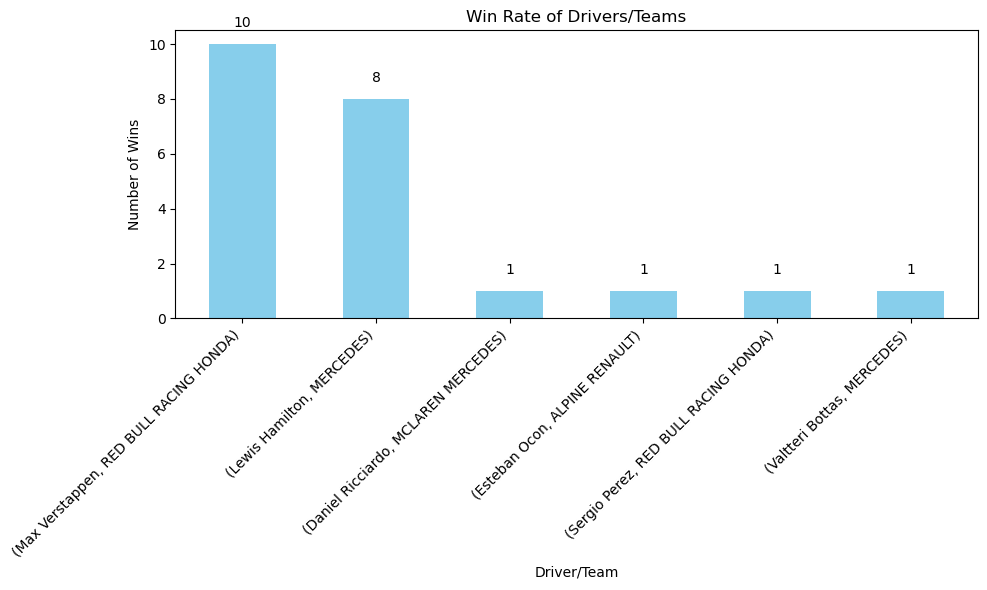

In [21]:
# Filter data to include only the rows where a driver or team finished in the 1st position
winners = data[data['POS'] == 1]

# Count the number of wins for each driver or team
win_counts = winners.groupby(['DRIVER', 'CAR'])['SEQ'].nunique().sort_values(ascending=False)

# Plot the win rate using a bar chart
plt.figure(figsize=(10, 6))
win_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')  # Sort in descending order
plt.title('Win Rate of Drivers/Teams')
plt.xlabel('Driver/Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')

# Display the number of wins over each bar
for i, v in enumerate(win_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("/Users/miteshramteke/Downloads/F1 dataset/2021 /races-2021new.csv")

# Group the data by race and sum the points scored by each driver or team in each race
race_points = data.groupby(['RACE', 'DRIVER', 'CAR'])['PTS'].sum().reset_index()

# Plot a bar chart for each race showing the distribution of points
plt.figure(figsize=(12, 8))

for race in race_points['RACE'].unique():
    race_data = race_points[race_points['RACE'] == race]
    plt.bar(race_data['DRIVER'] + ' - ' + race_data['CAR'], race_data['PTS'], label=race)

plt.title('Distribution of Points by Drivers/Teams in Each Race')
plt.xlabel('Driver/Team')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.legend(title='Race')
plt.tight_layout()
plt.show()


KeyError: 'Column not found: PTS'

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file containing race data
data = pd.read_csv("races-2021new.csv")

# Group the data by driver or team and sum the points scored in each race
driver_points = data.groupby(['DRIVER', 'CAR'])['PTS'].cumsum()

# Plot a line graph for the cumulative points of each driver or team over time (races)
plt.figure(figsize=(12, 8))

for driver, points in driver_points.groupby([data['DRIVER'], data['CAR']]):
    plt.plot(points.index, points.values, marker='o', label=driver[0] + ' - ' + driver[1])

plt.title('Performance of Drivers/Teams Over Time')
plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.xticks(range(len(data)), data['RACE'], rotation=45)  # Assuming 'RACE' contains race names
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Column not found: PTS'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file containing race data
data = pd.read_csv("races-2021.csv")

# Group the data by driver or team and sum the points scored in each race
driver_points = data.groupby(['DRIVER', 'CAR'])['PTS'].cumsum()

# Plot a line graph for the cumulative points of each driver or team over time (races)
plt.figure(figsize=(12, 8))

for driver, points in driver_points.groupby([data['DRIVER'], data['CAR']]):
    plt.plot(points.index, points.values, marker='o', label=driver[0] + ' - ' + driver[1])

plt.title('Performance of Drivers/Teams Over Time')
plt.xlabel('Race Number')
plt.ylabel('Cumulative Points')
plt.xticks(range(len(data)), data['RACE'], rotation=45)  # Assuming 'RACE' contains race names
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Column not found: PTS'

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("races-2021.csv")

# Group by race and driver/team, and sum the points
race_points = data.groupby(['RACE', 'DRIVER', 'CAR'])['PTS'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))

# Iterate over each race and plot the points for each driver/team
for race in race_points['RACE'].unique():
    race_data = race_points[race_points['RACE'] == race]
    plt.barh(race_data['DRIVER'] + ' - ' + race_data['CAR'], race_data['PTS'], label=race)

plt.xlabel('Points')
plt.ylabel('Driver/Team')
plt.title('Distribution of Points by Driver/Team in Each Race')
plt.legend(title='Race')
plt.tight_layout()
plt.show()


KeyError: 'Column not found: PTS'

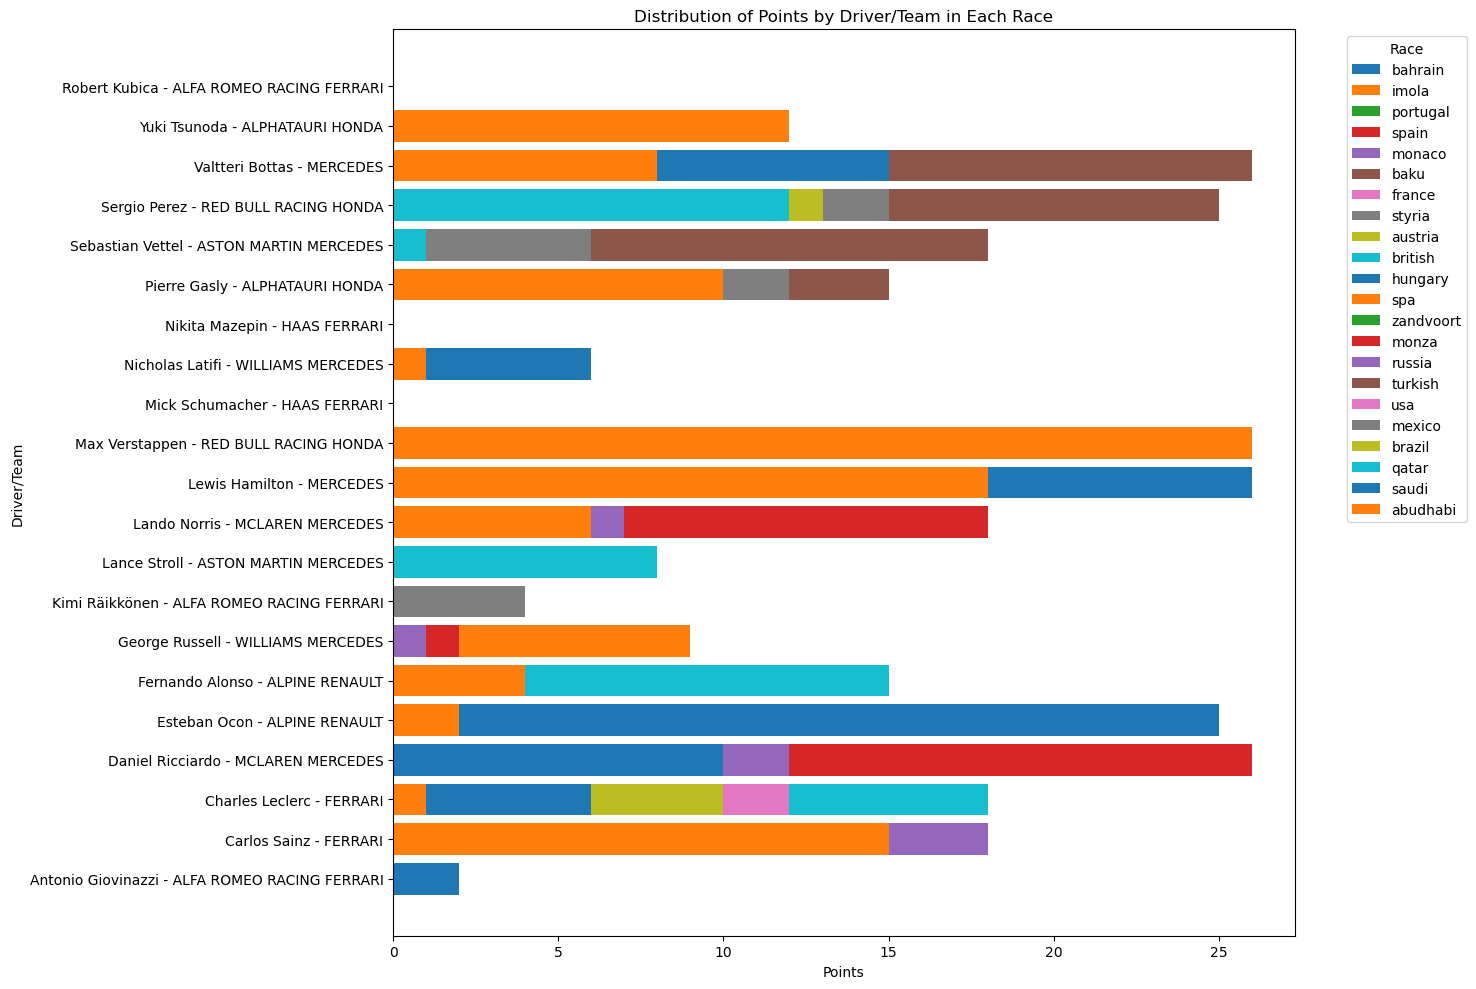

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files for each race
race_data = {
    "bahrain": pd.read_csv("bahrain-2021.csv"),
    "imola": pd.read_csv("imola-2021.csv"),
    "portugal": pd.read_csv("portugal-2021.csv"),
    "spain": pd.read_csv("spain-2021.csv"),
    "monaco": pd.read_csv("monaco-2021.csv"),
    "baku": pd.read_csv("baku-2021.csv"),
    "france": pd.read_csv("france-2021.csv"),
    "styria": pd.read_csv("styria-2021.csv"),
    "austria": pd.read_csv("austria-2021.csv"),
    "british": pd.read_csv("british-2021.csv"),
    "hungary": pd.read_csv("hungary-2021.csv"),
    "spa": pd.read_csv("spa-2021.csv"),
    "zandvoort": pd.read_csv("zandvoort-2021.csv"),
    "monza": pd.read_csv("monza-2021.csv"),
    "russia": pd.read_csv("russia-2021.csv"),
    "turkish": pd.read_csv("turkish-2021.csv"),
    "usa": pd.read_csv("usa-2021.csv"),
    "mexico": pd.read_csv("mexico-2021.csv"),
    "brazil": pd.read_csv("brazil-2021.csv"),
    "qatar": pd.read_csv("qatar-2021.csv"),
    "saudi": pd.read_csv("saudi-2021.csv"),
    "abudhabi": pd.read_csv("abudhabi-2021.csv")
}

# Plot the distribution of points scored by drivers or teams in each race
plt.figure(figsize=(15, 10))

# Iterate over each race and plot the points for each driver/team
for race, data in race_data.items():
    race_points = data.groupby(['DRIVER', 'CAR'])['PTS'].sum().reset_index()
    plt.barh(race_points['DRIVER'] + ' - ' + race_points['CAR'], race_points['PTS'], label=race)

plt.xlabel('Points')
plt.ylabel('Driver/Team')
plt.title('Distribution of Points by Driver/Team in Each Race')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


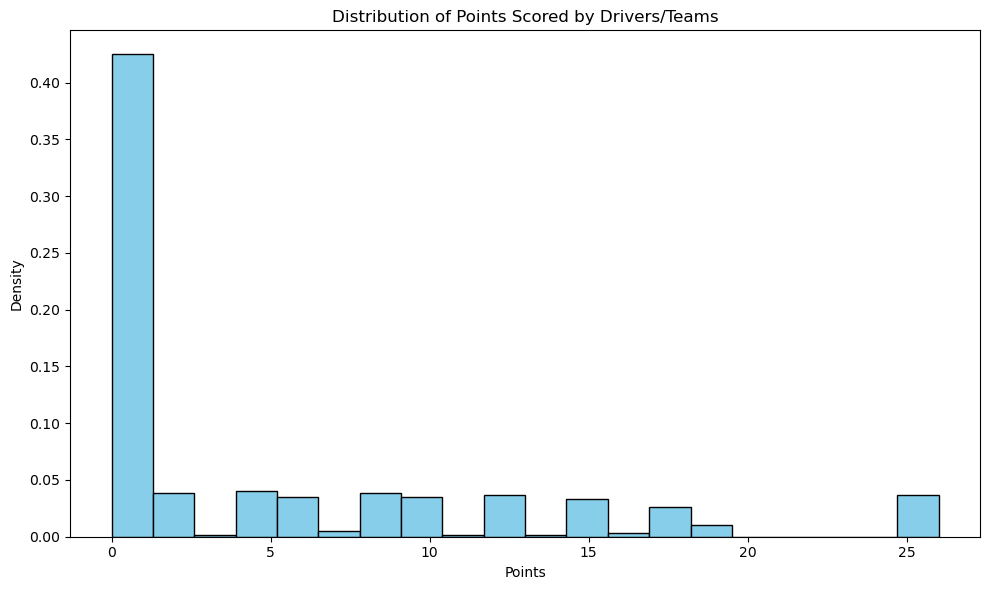

In [31]:
# Concatenate all race data into a single DataFrame
all_race_data = pd.concat(race_data.values(), ignore_index=True)

# Plot histogram or density plot to visualize the distribution of points
plt.figure(figsize=(10, 6))
plt.hist(all_race_data['PTS'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Points')
plt.ylabel('Density')
plt.title('Distribution of Points Scored by Drivers/Teams')
plt.grid(False)
plt.tight_layout()
plt.show()

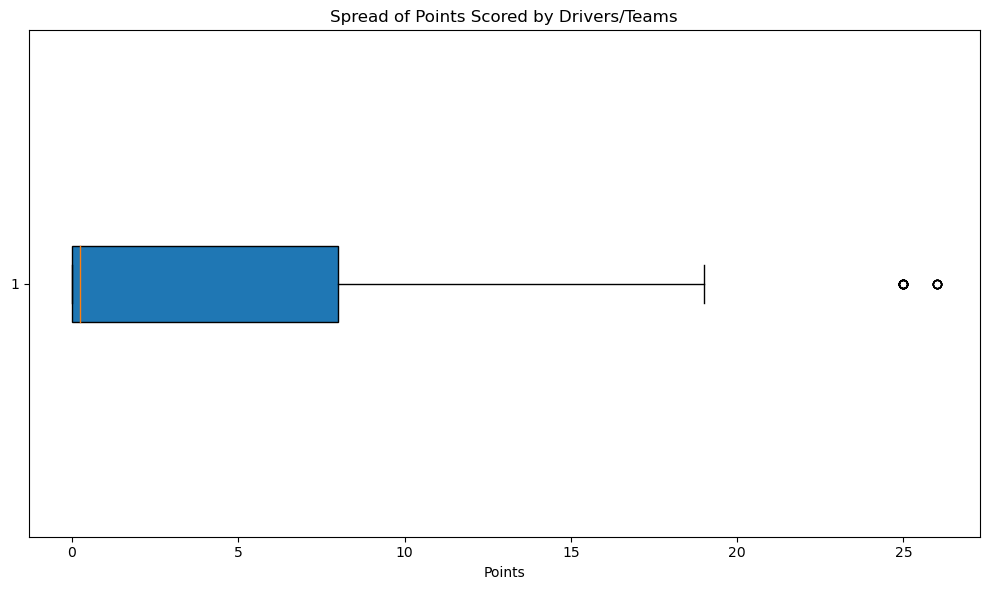

In [32]:

# Concatenate all race data into a single DataFrame
all_race_data = pd.concat(race_data.values(), ignore_index=True)

# Create a box plot to compare the spread of points
plt.figure(figsize=(10, 6))
plt.boxplot(all_race_data['PTS'], vert=False, patch_artist=True)
plt.xlabel('Points')
plt.title('Spread of Points Scored by Drivers/Teams')
plt.grid(False)
plt.tight_layout()
plt.show()

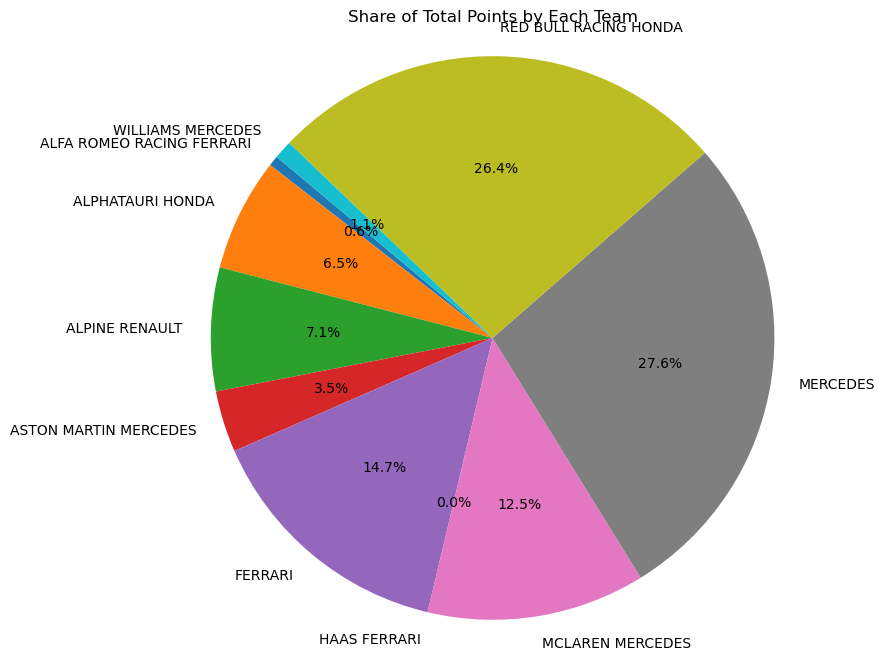

In [33]:
import matplotlib.pyplot as plt

# Calculate the total points scored by each team
team_points = all_race_data.groupby('CAR')['PTS'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(team_points, labels=team_points.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Total Points by Each Team')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_38744/2865417043.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = all_race_data.corr()


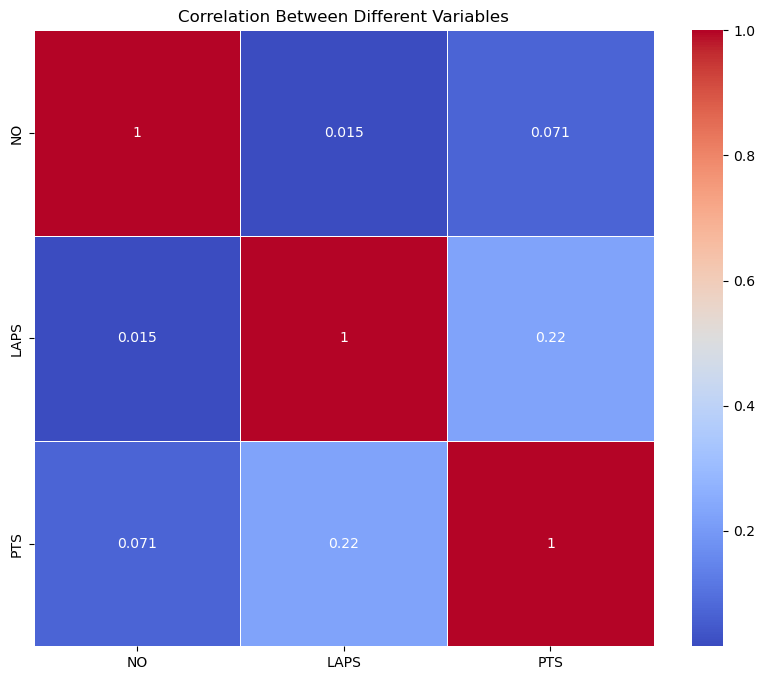

In [34]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = all_race_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Different Variables')
plt.show()


In [35]:
import numpy as np

# Define the attributes for comparison (e.g., points, race position, laps completed, etc.)
attributes = ['PTS', 'LAPS', 'POS']  # Add more attributes as needed

# Define the teams/drivers to compare
teams_to_compare = ['MERCEDES', 'RED BULL RACING HONDA', 'FERRARI']  # Add more teams/drivers as needed

# Filter data for the teams/drivers to compare
comparison_data = all_race_data[all_race_data['CAR'].isin(teams_to_compare)]

# Calculate the mean values for each attribute for each team/driver
mean_values = comparison_data.groupby('CAR')[attributes].mean().reset_index()

# Normalize the values for radar chart
max_values = mean_values[attributes].max(axis=0)
min_values = mean_values[attributes].min(axis=0)
normalized_values = (mean_values[attributes] - min_values) / (max_values - min_values)

# Create a radar chart for each team/driver
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()

plt.figure(figsize=(10, 8))
for i, team in enumerate(teams_to_compare):
    values = normalized_values.loc[normalized_values['CAR'] == team].values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax = plt.subplot(1, len(teams_to_compare), i + 1, polar=True)
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_title(team)

plt.show()


/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_38744/83121190.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = comparison_data.groupby('CAR')[attributes].mean().reset_index()


KeyError: "['POS'] not in index"